<a href="https://colab.research.google.com/github/jscottvogel/ImageSegmentation/blob/main/91093_A03_Project3_Vogel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Kaggle Competition - Semantic Segmentation


#### <font style="color:green">Maximum Points: 100</font>

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3><center>Sections</center></h3></td> <td><h3><center>Points</center></h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Custom Dataset Class</h3></td> <td><h3><center>7</center></h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Visualize Dataset</h3></td> <td><h3><center>3</center></h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Loss Function</h3></td> <td><h3><center>5</center></h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Evaluation Metrics</h3></td> <td><h3><center>5</center></h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3><center>10</center></h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Train and Plot Results</h3></td> <td><h3><center>7</center></h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Inference</h3></td> <td><h3><center>3</center></h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>Prepare Submission CSV</h3></td><td><h3><center>10</center></h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Submission Score</h3></td> <td><h3><center>50</center></h3></td> </tr>
    </table>
</div>

**Kaggle Submission Score Points Distribution on Public Test Set**


<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Public Test Set Dice Score</h3></td> <td><h3><center>Points</center></h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3> <center>&le; 79%</center></h3></td><td><h3><center>0</center></h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3><center>80%</center></h3></td><td><h3><center>10</center></h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3><center>81%</center></h3></td><td><h3><center>20</center></h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3> <center>82%</center></h3></td><td><h3><center>30</center></h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3> <center>83%</center></h3></td><td><h3><center>40</center></h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3><center> &ge; 84%</center></h3></td><td><h3><center>50</center></h3></td> </tr>
    </table>
</div>

**Note: Percentages will be rounded off to the nearest integer.**

**<font style="color:red">Please do not make your notebooks public or publish them on the competition page. You only need to submit your notebook to the lab. This is to make sure that students don't copy each other. You are free to take references from any online resource.</font>**

----------

## 1. Custom Dataset Class [7 Points]

<font style="color:red">In this section you have to implement your own dataset generator.</font>

You can either the `Sequence` class or `tf.data` API or any other method to create training and validation data generators.

**Note:** There is no separate validation data, so you will have to create your own validation set by dividing training set into train and validation sets.


For example:

```python

class CustomSegmentationDataset(Sequence):
    
    def __init__(self, *, batch_size, image_size, image_paths, mask_paths, num_classes, apply_aug):
        '''
        Generic Dataset class for semantic segmentation datasets
        
        Arguments:
            batch_size:  Number of samples to be included in each batch of data.
            image_size:  Image and mask size to be used for training.
            image_paths: Path to image directory.
            mask_paths:  Path to masks directory.
            num_classes: Total number of classes present in dataset.
            apply_aug:   Should augmentations be applied.
        '''

```

In this project, you will be working with the FloodNet dataset.
There are 10 classes present in this dataset.
A total of 1843 samples will be available to you for training and 500 samples for final evaluation/testing.
You can split the training set into a train and validation set.


Directory Details:
train/images: Contains a total of 1843 JPG images.
train/masks : Contains a total of 1843 PNG masks for training images.
test/images : Contains a total of 500 JPG images to be used for final evaluation.

The different classes present in the dataset are:

Class ID	Class Name	Mask Color Code (R,G,B)
0	Background	(0, 0, 0)
1	Building Flooded	(255, 0, 0)
2	Building Non-Flooded	(200, 90, 90)
3	Road Flooded	(128, 128, 0)
4	Road Non-Flooded	(155, 155, 155)
5	Water	(0, 255, 255)
6	Tree	(55, 0, 255)
7	Vehicle	(255, 0, 255)
8	Pool	(245, 245, 0)
9	Grass	(0, 255, 0)
Note:

Points for the Kaggle Submission Score section will depend on your score on the Public Test Leaderboard.
The Public Test Leaderboard score is generated by considering 50% of the Test data.
Files
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format
Columns
IMG_ID - Represents {image_name}_{class_number}.
EncodedString -- Pixel values represented in Run-length encoded format.
Kaggle Submission Score Points Distribution on Public Test Set

Sr. no.
Public Test Set Dice Score
Points
1
≤ 79%
0
2
80%
10
3
81%
20
4
82%
30
5
83%
40
6
≥ 84%
50
Note: Percentages will be rounded off to the nearest integer.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jul  6 12:51:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P0             35W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -q -U albumentations

In [ ]:
import os
import zipfile
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Layer
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, Activation, concatenate, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization, Dropout, UpSampling2D, SpatialDropout2D
from tensorflow.keras.saving import register_keras_serializable
from tensorflow.keras.applications.resnet50 import preprocess_input # Import preprocess_input

from sklearn.model_selection import train_test_split
from dataclasses import dataclass
import platform
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sn
from sklearn.metrics import confusion_matrix
import glob as glob
import requests
import albumentations as A
import cv2

from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    MaxPooling2D,
    Flatten,
    Dense,
    GlobalAveragePooling2D,
    Rescaling,
    Dropout,
    Softmax,
    AveragePooling2D,
    Conv2DTranspose,
    Activation,
    MaxPool2D,
    UpSampling2D,
    Concatenate,
    ZeroPadding2D,
    RandomRotation,
    RandomFlip,
    RandomZoom,
    RandomBrightness,
    RandomContrast,
    Resizing,
    Cropping2D,
    Add,
)

from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.applications import ResNet101, VGG16, VGG19, DenseNet121, DenseNet169, DenseNet201, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7, InceptionResNetV2, InceptionV3, MobileNet, MobileNetV2, NASNetLarge, NASNetMobile, ResNet50, ResNet152, Xception, InceptionV3, EfficientNetV2L
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall, AUC
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

plt.rcParams['image.cmap'] = 'gray'


# Text formatting
bold = "\033[1m"
end = "\033[0m"

block_plot=False



In [ ]:
%matplotlib inline

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.18.0
Hub version: 0.16.1
GPU is available


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_ZIP_NAME = 'opencv-tf-project-3-image-segmentation-round-2.zip'
PROJECT_FOLDER = 'Project_3_FloodNet_Dataset'
ROOT_DIR = r"/content/drive/My Drive/kaggle"
TEST_CSV = os.path.join(ROOT_DIR, "test.csv")
SAMPLE_SUBMISSION_CSV = os.path.join(ROOT_DIR, "sample_submission.csv")

In [ ]:
PROJECT_DIR = os.path.join(ROOT_DIR, PROJECT_FOLDER)

images_folder_exists = os.path.isdir(PROJECT_DIR)

DATA_ZIP_FILE = os.path.join(ROOT_DIR, DATA_ZIP_NAME)

# check if images directory exists.  If it doesn't, then unzip the zip file
if (images_folder_exists == False):
  # unzip the image file
  with zipfile.ZipFile(DATA_ZIP_FILE, 'r') as zip_ref:
      zip_ref.extractall(ROOT_DIR)

TRAIN_DIR = os.path.join(ROOT_DIR, PROJECT_FOLDER, "train")
TRAIN_IMAGE_DIR = os.path.join(TRAIN_DIR, "images")
TRAIN_MASK_DIR = os.path.join(TRAIN_DIR, "masks")
TEST_DIR = os.path.join(ROOT_DIR, PROJECT_FOLDER, "test")
TEST_IMAGE_DIR = os.path.join(TEST_DIR, "images")
TEST_MASK_DIR = os.path.join(TEST_DIR, "masks")

print("Contents:")
for i in os.listdir(PROJECT_DIR):
    if os.path.isdir(os.path.join(PROJECT_DIR, i)):
        print(f"\tDirectory: {i}")
    else:
        print(f"\tFile: {i}")

#print the number of training images
print(f"\nNumber of training images: {len(os.listdir(TRAIN_IMAGE_DIR))}")

#print the number of training masks
print(f"\nNumber of training masks: {len(os.listdir(TRAIN_MASK_DIR))}")

#print the number of test images
print(f"\nNumber of test images: {len(os.listdir(TEST_IMAGE_DIR))}")

#assert training images = 1843
assert len(os.listdir(TRAIN_IMAGE_DIR)) == 1843, "Number of training images is not 1843"

#assert training masks = 1843
assert len(os.listdir(TRAIN_MASK_DIR)) == 1843, "Number of training masks is not 1843"

#assert test images = 500
assert len(os.listdir(TEST_IMAGE_DIR)) == 500, "Number of test images is not 500"



Contents:
	Directory: test
	Directory: train
	Directory: Logs_Checkpoints
	File: submission (1).gsheet
	File: submission_shit.csv
	File: submission.gsheet
	File: 88626_submission.csv
	File: submission.csv

Number of training images: 1843

Number of training masks: 1843

Number of test images: 500


In [ ]:
# fix random seeds
SEED_VALUE = 42

def set_seeds():
    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    tf.random.set_seed(SEED_VALUE)
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)

    return

set_seeds()


In [ ]:
# Creating a MirroredStrategy for distributed training.
# This strategy effectively replicates the model's layers on each GPU or other available devices,
# syncing their weights after each training step.
DISTRIBUTE_STRATEGY = tf.distribute.MirroredStrategy()

In [ ]:
# Printing the number of devices that are in sync with the MirroredStrategy.
# This indicates how many replicas of the model are being trained in parallel.
print('Number of devices: {}'.format(DISTRIBUTE_STRATEGY.num_replicas_in_sync))

Number of devices: 1


In [ ]:
#tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
load_version = None
#load_version = "version_47" # 80743
#load_version = "version_59" # 89+ really good (deeplab with efficient - make sure correct model is created)
#load_version = "version_60" # 88
#load_version = "version_70"
#load_version = "version_77"
#load_version="version_94" 895
#load_version="version_99" 898
#load_version="version_100"
#load_version="version_101"
#load_version="version_104"
#load_version="version_112"
#load_version="version_122"
#load_version="version_134"
#load_version="version_139"
#load_version="version_140"
#load_version="version_141"
#load_version="version_142"
#load_version="version_143"
#load_version="version_144"
#load_version="version_145"
#load_version="version_142"

In [ ]:
@dataclass
class DatasetConfig:
    IMG_HEIGHT: int = 512 #320 #384 #224 #256 #480
    IMG_WIDTH: int = 512 #320 #384 #224 #256 #640
    IMG_CHANNELS: int = 3
    IMAGE_DIR: str = TRAIN_IMAGE_DIR
    MASK_DIR: str = TRAIN_MASK_DIR
    TEST_IMAGE_DIR: str = TEST_IMAGE_DIR
    TEST_MASK_DIR: str = TEST_MASK_DIR
    IMAGE_SIZE: tuple = (IMG_HEIGHT, IMG_WIDTH)
    DATA_SHAPE: tuple = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    NUM_CLASSES: int = 10
    APPLY_AUGMENTATION: bool = True

In [ ]:
@dataclass()
class TrainingConfig:
    BATCH_SIZE:      int = 4 #12 #8
    EPOCHS:          int = 101 #101
    LEARNING_RATE: float = 0.0001
    CHECKPOINT_DIR:  str = 'model_checkpoint/FloodNet'
    WEIGHTS: str = "imagenet"

    # For tensorboard logging and saving checkpoints

    root_dir = os.path.join(PROJECT_DIR, "Logs_Checkpoints")
    root_log_dir = os.path.join(root_dir, "Model_logs")
    root_checkpoint_dir = os.path.join(root_dir, "Model_checkpoints")

    # Current log and checkpoint directory.
    log_dir = "version_0"
    checkpoint_initial = "version_0"


In [ ]:
#removes the log folder
#!rm -rf TrainingConfig.root_dir

In [ ]:
id2color = {
    0: [0, 0, 0],       # Background/waterbody
    1: [255, 0, 0],     # Building Flooded
    2: [200, 90, 90],   # Building Non-Flooded
    3: [128, 128, 0],   # Road Flooded
    4: [155, 155, 155], # Road Non-Flooded
    5: [0, 255, 255],   # Water
    6: [55, 0, 255],    # Tree
    7: [255, 0, 255],   # Vehicle
    8: [245, 245, 0],   # Pool
    9: [0, 255, 0],     # Grass
 }

In [ ]:
id2labels = {
    0: 'Background/waterbody',
    1: 'Building Flooded',
    2: 'Building Non-Flooded',
    3: 'Road Flooded',
    4: 'Road Non-Flooded',
    5: 'Water',
    6: 'Tree',
    7: 'Vehicle',
    8: 'Pool',
    9: 'Grass',
}

In [ ]:
labels2id = {tuple(v): k for k, v in id2labels.items()}

In [ ]:
color2id = {tuple(v): k for k, v in id2color.items()}

In [ ]:
def rgb_to_onehot(rgb_arr, color_map, num_classes):
    """
    Converts an RGB mask to one-hot encoding using exact or nearest color matching.
    """
    from scipy.spatial import KDTree

    H, W, _ = rgb_arr.shape
    onehot = np.zeros((H, W, num_classes), dtype=np.uint8)

    # Prepare color list and index map
    color_list = np.array(list(color_map.values()))
    class_indices = list(color_map.keys())

    tree = KDTree(color_list)

    reshaped = rgb_arr.reshape(-1, 3)
    distances, indices = tree.query(reshaped)

    # Build label map
    label_map = np.array([class_indices[i] for i in indices]).reshape(H, W)

    for c in range(num_classes):
        onehot[:, :, c] = (label_map == c).astype(np.uint8)

    return onehot

In [ ]:
# Function to convert a single channel mask representation to an RGB mask.
def num_to_rgb(num_arr, color_map=id2color):
    single_layer = np.squeeze(num_arr)

    output = np.zeros(num_arr.shape[:2]+(3,), dtype=np.uint8) # Changed the data type to uint8

    for k in color_map.keys():
        output[single_layer==k] = color_map[k]

    #return output # return a floating point array in range [0.0, 1.0]
    return np.float32(output) / 255. # return a floating point array in range [0.0, 1.0]

In [ ]:
# Function to overlay a segmentation map on top of an RGB image.
def image_overlay(image, segmented_image):

    alpha = 1.0  # Transparency for the original image.
    beta = 0.7  # Transparency for the segmentation map.
    gamma = 0.0  # Scalar added to each sum.

    # Resize segmented_image to match image dimensions
    segmented_image = cv2.resize(segmented_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Convert both images to the same data type (e.g., np.uint8) before blending
    image = (image * 255).astype(np.uint8)  # Convert to uint8
    segmented_image = (segmented_image * 255).astype(np.uint8)  # Convert to uint8

    # Perform blending
    overlayed_image = cv2.addWeighted(image, alpha, segmented_image, beta, gamma)

    # Convert the result back to float32 and normalize to [0, 1]
    overlayed_image = overlayed_image.astype(np.float32) / 255.0

    return overlayed_image


In [ ]:
def display_image_and_mask(data_list, color_mask=False, color_map=id2color):

    plt.figure(figsize=(16, 6))
    title = ['GT Image', 'GT Mask', 'Overlayed Mask']

    img = data_list[0]
    msk = data_list[1]

    grayscale_gt_mask = np.argmax(msk, axis=-1)

    # Create RGB segmentation map from grayscale segmentation map.
    rgb_gt_mask = num_to_rgb(grayscale_gt_mask, color_map=color_map)

    #print(f"Image shape: {img.shape}")
    #print(f"Mask shape: {msk.shape}")
    #print(f"Grayscale Mask shape: {grayscale_gt_mask.shape}")
    #print(f"RGB Mask shape: {rgb_gt_mask.shape}")

    # Create the overlayed image.
    overlayed_image = image_overlay(img, rgb_gt_mask)

    data_list.append(overlayed_image)

    for i in range(len(data_list)):
        plt.subplot(1, len(data_list), i+1)
        plt.title(title[i])
        if title[i] == 'GT Mask':
            if color_mask:
                plt.imshow(np.array(rgb_gt_mask))
            else:
                plt.imshow(np.array(grayscale_gt_mask))
        else:
            plt.imshow(np.array(data_list[i]))
        plt.axis('off')

    plt.show()

In [ ]:
from skimage.filters import sobel

def mask_to_soft_edge(one_hot_mask, sigma=1.0):
    """Create a soft edge map from a one-hot mask using Sobel gradients."""
    edge_maps = []
    for i in range(one_hot_mask.shape[-1]):
        class_mask = one_hot_mask[..., i].astype(np.uint8)
        grad_x = cv2.Sobel(class_mask, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(class_mask, cv2.CV_64F, 0, 1, ksize=3)
        grad_mag = np.sqrt(grad_x ** 2 + grad_y ** 2)
        edge_maps.append(grad_mag)
    edge = np.sum(edge_maps, axis=0)
    edge = np.clip(edge, 0, 1).astype(np.float32)
    edge = edge[..., np.newaxis]
    return edge

In [ ]:

def apply_mosaic(images, masks, out_size):
    """Apply mosaic augmentation from 4 images and masks."""
    h, w = out_size
    yc, xc = [int(random.uniform(0.3, 0.7) * s) for s in out_size]

    output_img = np.zeros((h, w, 3), dtype=np.uint8)
    output_msk = np.zeros((h, w, 3), dtype=np.uint8)

    for i in range(4):
        img = cv2.resize(images[i], (w, h))
        msk = cv2.resize(masks[i], (w, h), interpolation=cv2.INTER_NEAREST)

        if i == 0:
            output_img[:yc, :xc] = img[:yc, :xc]
            output_msk[:yc, :xc] = msk[:yc, :xc]
        elif i == 1:
            output_img[:yc, xc:] = img[:yc, xc:]
            output_msk[:yc, xc:] = msk[:yc, xc:]
        elif i == 2:
            output_img[yc:, :xc] = img[yc:, :xc]
            output_msk[yc:, :xc] = msk[yc:, :xc]
        else:
            output_img[yc:, xc:] = img[yc:, xc:]
            output_msk[yc:, xc:] = msk[yc:, xc:]

    return output_img, output_msk


In [ ]:
import albumentations as A
from albumentations.core.composition import OneOf

# Define augmentations
def get_albumentations_augmentations():
    return A.Compose([
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.HueSaturationValue(hue_shift_limit=30, sat_shift_limit=40, val_shift_limit=30, p=0.5),
        A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.5),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
        A.MotionBlur(blur_limit=5, p=0.5),  # existing one
        A.GaussianBlur(blur_limit=3, p=0.5),  # existing
        A.MedianBlur(blur_limit=5, p=0.5),
        A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=0.5),  # added
        A.GridDropout(ratio=0.5, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.5),
        A.RandomRotate90(p=0.5),
        A.Transpose(p=0.5),
        A.GridDistortion(p=0.5),
        A.CoarseDropout(max_holes=5, max_height=32, max_width=32, p=0.5),
        A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.5),
        A.RandomGamma(gamma_limit=(60, 140), p=0.5),
        A.Rotate(limit=45, p=0.5),
        A.ChannelShuffle(p=0.5),
        A.Posterize(num_bits=4, p=0.5),
        A.Solarize(threshold=128, p=0.5),
        A.ImageCompression(quality_lower=40, quality_upper=80, p=0.5),
        A.OpticalDistortion(distort_limit=0.4, shift_limit=0.2, border_mode=0, p=0.5),
        A.NoOp()
    ])


In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np
import cv2
import random

class FloodNetSegmentationDataset(Sequence):
    def __init__(self, batch_size, image_size, image_paths, mask_paths, num_classes,
                 class_frequencies, id2color, apply_aug=True, use_mosaic=True,
                 apply_cutmix=True, alpha=0.4, warmup_epochs=10, **kwargs):
        super().__init__(**kwargs)
        self.batch_size = batch_size
        self.image_size = image_size
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.num_classes = num_classes
        self.class_frequencies = class_frequencies
        self.id2color = id2color
        self.apply_aug = apply_aug
        self.use_mosaic = use_mosaic
        self.apply_cutmix = apply_cutmix
        self.alpha = alpha
        self.current_epoch = 0
        self.warmup_epochs = warmup_epochs
        self.albumentations = get_albumentations_augmentations()
        self.on_epoch_end()

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.image_paths))
        np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        X, y_main, y_edge = self.__data_generation(indexes)
        return X, {
            'main_output': y_main,
            'edge_output_upsample': y_edge,
            'side_output_upsample': y_main,
            'mid_output': y_main,
            'high_output': y_main,
##            'shallow_output': y_main,
            'low_output': y_main,
            'mid_high_output': y_main,
        }

    def __data_generation(self, indexes):
        # Output arrays
        X = np.empty((self.batch_size, *self.image_size, 3), dtype=np.float32)
        y_main = np.empty((self.batch_size, *self.image_size, self.num_classes), dtype=np.float32)
        y_edge = np.empty((self.batch_size, *self.image_size, 1), dtype=np.float32)

        batch_imgs = []
        batch_msks = []

        for idx in indexes:
            img = cv2.cvtColor(cv2.imread(self.image_paths[idx]), cv2.COLOR_BGR2RGB)
            msk = cv2.cvtColor(cv2.imread(self.mask_paths[idx]), cv2.COLOR_BGR2RGB)
            # Resize using (width, height) for cv2.resize
            img = cv2.resize(img, (self.image_size[1], self.image_size[0]), interpolation=cv2.INTER_NEAREST)
            msk = cv2.resize(msk, (self.image_size[1], self.image_size[0]), interpolation=cv2.INTER_NEAREST)

            batch_imgs.append(img)
            batch_msks.append(msk)

        batch_imgs = np.array(batch_imgs)
        batch_msks = np.array(batch_msks)

        for i in range(self.batch_size):

            img = batch_imgs[i]
            msk = batch_msks[i]

            if self.use_mosaic and self.current_epoch >= self.warmup_epochs:
              if np.random.rand() < 0.3:
                # select 4 random indices for mosaic from the batch
                idxs = [i] + random.sample(range(len(batch_imgs)), 3)

                # copy the images from the batch using the 4 indicies
                imgs_for_mosaic = [batch_imgs[j] for j in idxs]
                msks_for_mosaic = [batch_msks[j] for j in idxs]

                # apply_mosaic already resizes to self.image_size
                img, msk = apply_mosaic(imgs_for_mosaic, msks_for_mosaic, self.image_size)
            elif self.apply_cutmix and self.current_epoch >= self.warmup_epochs:
              if np.random.rand() < 0.3:
                if np.random.rand() < 0.5:
                  img, msk = self.cutmix(img, msk)
                else:
                  img, msk = self.frequency_based_mixup(img, msk)
            else:
              if self.apply_aug:
                augmented = self.albumentations(image=img, mask=msk)
                img, msk = augmented["image"], augmented["mask"]

            msk = msk.astype(np.uint8)

            onehot = rgb_to_onehot(msk, color_map=id2color, num_classes=self.num_classes)

            edge = mask_to_soft_edge(onehot)

            # normalize the image
            img = img / 255.0

            X[i] = img
            y_main[i] = onehot
            y_edge[i] = edge

        return X, y_main, y_edge

    def set_epoch(self, epoch):
        self.current_epoch = epoch

    def frequency_based_mixup(self, images, masks):
        batch_size = images.shape[0]
        num_classes = self.num_classes

        weights = 1.0 / (self.class_frequencies + 1e-6)
        weights /= np.sum(weights)

        dominant_class = np.argmax(np.sum(masks, axis=(1, 2)), axis=1)  # (B,)
        sample_weights = weights[dominant_class]  # (B,)

        indices = np.random.permutation(batch_size)
        lam = np.random.beta(self.alpha, self.alpha, size=(batch_size, 1, 1, 1)).astype(np.float32)

        mixed_images = lam * images + (1 - lam) * images[indices]
        mixed_masks = lam * masks + (1 - lam) * masks[indices]

        return mixed_images, mixed_masks

    def cutmix(self, images, masks, alpha=1.0):
        indices = np.random.permutation(self.batch_size)
        x1, x2 = images, images[indices]
        y1, y2 = masks, masks[indices]

        h, w = self.image_size
        cut_rat = np.sqrt(np.random.uniform(0.3, 0.7))
        cut_w = max(1, int(w * cut_rat))
        cut_h = max(1, int(h * cut_rat))

        cx = np.random.randint(w)
        cy = np.random.randint(h)

        x1_start = np.clip(cx - cut_w // 2, 0, w)
        y1_start = np.clip(cy - cut_h // 2, 0, h)
        x2_end = np.clip(cx + cut_w // 2, 0, w)
        y2_end = np.clip(cy + cut_h // 2, 0, h)

        for i in range(self.batch_size):
            x1[i, y1_start:y2_end, x1_start:x2_end] = x2[i, y1_start:y2_end, x1_start:x2_end]
            y1[i, y1_start:y2_end, x1_start:x2_end] = y2[i, y1_start:y2_end, x1_start:x2_end]

        return x1, y1

In [ ]:
def compute_class_frequencies(mask_paths, num_classes, image_size):
    """
    Compute class pixel frequencies across a dataset.

    Args:
        mask_paths: List of mask image file paths.
        num_classes: Total number of classes.
        image_size: Tuple (H, W) for resizing masks.

    Returns:
        class_frequencies: np.array of shape (num_classes,)
    """
    # Initialize total_pixels_per_class as float64 to avoid type issues during summation
    total_pixels_per_class = np.zeros(num_classes, dtype=np.float64)
    total_pixels = 0

    for path in mask_paths:
        mask = cv2.imread(path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        mask = cv2.resize(mask, (image_size[1], image_size[0]), interpolation=cv2.INTER_NEAREST)

        mask = mask.astype(np.uint8)

        onehot = rgb_to_onehot(mask, color_map=id2color, num_classes=num_classes)

        # Ensure the sum is also treated as float64 for the addition
        pixels_per_class = np.sum(onehot, axis=(0, 1), dtype=np.float64)
        total_pixels_per_class += pixels_per_class
        total_pixels += np.sum(pixels_per_class)

    class_frequencies = total_pixels_per_class / (total_pixels + 1e-6)

    # assert that the total pixels = H times W
    assert np.isclose(total_pixels, image_size[0] * image_size[1] * len(mask_paths), atol=1e-6), \
        f"Assertion failed: Total pixels ({total_pixels}) != Expected pixels ({image_size[0] * image_size[1] * len(mask_paths)})"

    return class_frequencies

In [ ]:

image_paths = sorted(glob.glob(os.path.join(TRAIN_IMAGE_DIR, "*.jpg")))
mask_paths = sorted(glob.glob(os.path.join(TRAIN_MASK_DIR, "*.png")))

# Split the data into training and validation sets
train_image_paths, val_image_paths, train_mask_paths, val_mask_paths = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=SEED_VALUE
)

class_frequencies = compute_class_frequencies(train_mask_paths, num_classes=DatasetConfig.NUM_CLASSES, image_size=DatasetConfig.IMAGE_SIZE)

# Step 2: Create dataset with vehicle oversampling
train_dataset = FloodNetSegmentationDataset(
    batch_size=TrainingConfig.BATCH_SIZE,
    image_size=DatasetConfig.IMAGE_SIZE,
    image_paths=train_image_paths,
    mask_paths=train_mask_paths,
    num_classes=DatasetConfig.NUM_CLASSES,
    class_frequencies=class_frequencies,
    id2color=id2color,
    apply_aug=True,
    use_mosaic=True,
    apply_cutmix=True,  # Enable MixUp + CutMix
    alpha=0.4,
)

val_dataset = FloodNetSegmentationDataset(
    batch_size=TrainingConfig.BATCH_SIZE,
    image_size=DatasetConfig.IMAGE_SIZE,
    image_paths=val_image_paths,
    mask_paths=val_mask_paths,
    num_classes=DatasetConfig.NUM_CLASSES,
    class_frequencies=class_frequencies,
    id2color=id2color,
    apply_aug=False,  # No augmentation for validation data
    use_mosaic=False,
    apply_cutmix=False,  # Disable MixUp + CutMix for validation
)


/tmp/ipython-input-28-681964292.py:10: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipython-input-28-681964292.py:22: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=5, max_height=32, max_width=32, p=0.5),
/tmp/ipython-input-28-681964292.py:23: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.5),
/tmp/ipython-input-28-681964292.py:28: UserWarning: Argument(s) 'threshold' are not valid for transform Solarize
  A.Solarize(threshold=128, p=0.5),
/tmp/ipython-input-28-681964292.py:29: UserWar

In [ ]:
def compute_class_weights(class_frequencies, smoothing=1e-6):
    # Avoid division by zero
    weights = 1.0 / (class_frequencies + smoothing)

    # Normalize weights so the average is ~1.0
    weights = weights / np.mean(weights)
    return weights

In [ ]:
#class_weights = compute_class_weights_from_labels(np.concatenate([train_dataset[i][1] for i in range(len(train_dataset))]), num_classes=DatasetConfig.NUM_CLASSES)
#print(class_weights)



#    0: 'Background/waterbody',
#    1: 'Building Flooded',
#    2: 'Building Non-Flooded',
#    3: 'Road Flooded',
#    4: 'Road Non-Flooded',
#    5: 'Water',
#    6: 'Tree',
#    7: 'Vehicle',
#    8: 'Pool',
#    9: 'Grass',

class_weights = tf.Variable(initial_value=np.ones((10,), dtype=np.float32), trainable=False)

#class_weights = [
#    0.0941,  # Background/waterbody
#    0.2519,  # Building Flooded
#    0.0697,  # Building Non-Flooded
#    0.2615,  # Road Flooded
#    0.0493,  # Road Non-Flooded
#    0.0607,  # Water
#    0.0345,  # Tree
#    0.0987,  # Vehicle
#    0.1365,  # Pool
#    0.0132   # Grass
#]

class_weights.assign([
    0.0481,  # Background/Waterbody
    0.4213,  # Building Flooded
    0.0392,  # Building Non-Flooded
    0.4079,  # Road Flooded
    0.0262,  # Road Non-Flooded
    0.0305,  # Water
    0.0100,  # Tree
    0.0614,  # Vehicle
    0.0544,  # Pool
    0.0010   # Grass
])

class_weights.assign([
    0.0020,  # Background/Waterbody
    0.5684,  # Building Flooded         🔺
    0.3061,  # Building Non-Flooded
    0.6088,  # Road Flooded             🔺
    0.2700,  # Road Non-Flooded
    0.0337,  # Water
    0.0148,  # Tree
    0.5000,  # Vehicle                  🔺
    0.3000,  # Pool                     🔺
    0.0020   # Grass
])

model_class_weights = compute_class_weights(class_frequencies)

# override weights based on results
model_class_weights[0] = 2 * model_class_weights[0]
model_class_weights[3] = 2 * model_class_weights[3]
model_class_weights[4] = 2 * model_class_weights[4]
model_class_weights[7] = 2 * model_class_weights[7]
model_class_weights[8] = 2 * model_class_weights[8]

class_weights.assign(model_class_weights)

# print the class names and corresponding weights display 4 places after decimal and print name of class as well as index
for i in range(DatasetConfig.NUM_CLASSES):
    class_name = id2labels[i]
    print(f"{class_name}: {class_weights[i]:.4f}")


Background/waterbody: 0.7502
Building Flooded: 0.4690
Building Non-Flooded: 0.2462
Road Flooded: 0.5910
Road Non-Flooded: 0.2880
Water: 0.0726
Tree: 0.0450
Vehicle: 8.9154
Pool: 7.7610
Grass: 0.0144


## 2. Visualize Dataset [3 Points]


<font style="color:red">In this section, you have to plot any 3 images from the training set with their corresponding masks and an overlayed image.</font>


For example:

---
---

<img src="https://www.dropbox.com/scl/fi/98gw2ijb1v4oefk5842en/c4-project3-GT.jpg?rlkey=t21lofna1z0bn6fclcubpiun4&dl=1">

---

In [ ]:
# prompt: def display_validation_data(validation_dataset, num_samples=3):

def display_validation_data(validation_dataset, num_samples=3):
    for i in range(num_samples):
        image, masks = validation_dataset[i]  # Handle cases where num_samples > dataset size

        main_mask = masks["main_output"] # Get the mask from the 'main_output' key

        display_image_and_mask([(image[0]).astype(np.float32), main_mask[0]], color_mask=True)


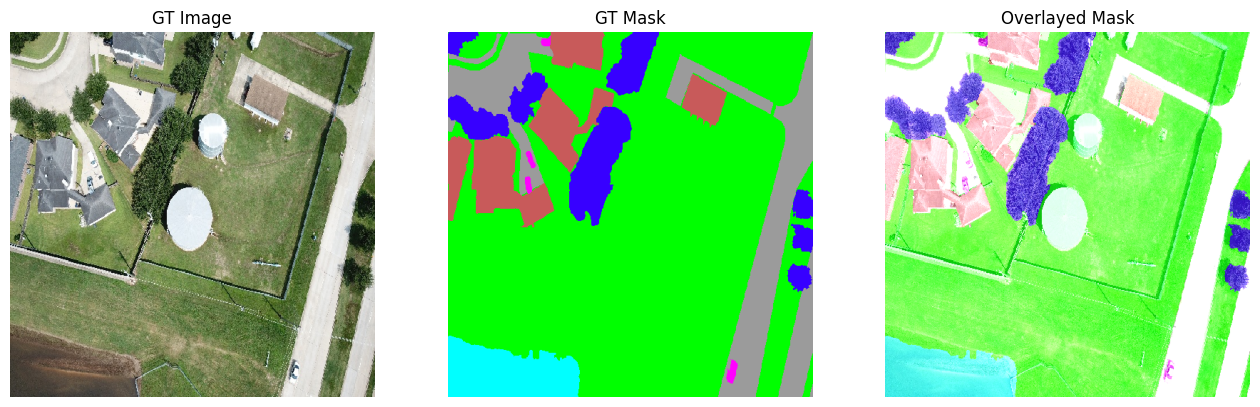

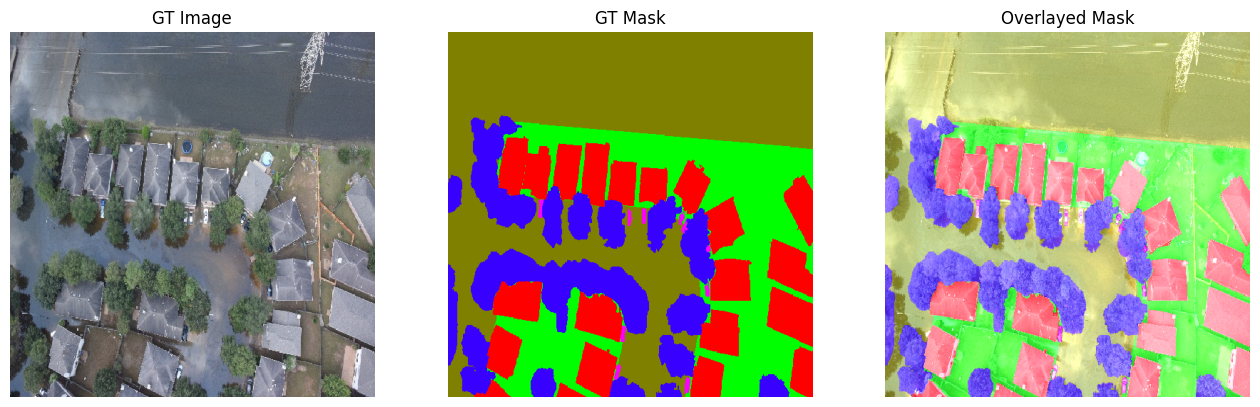

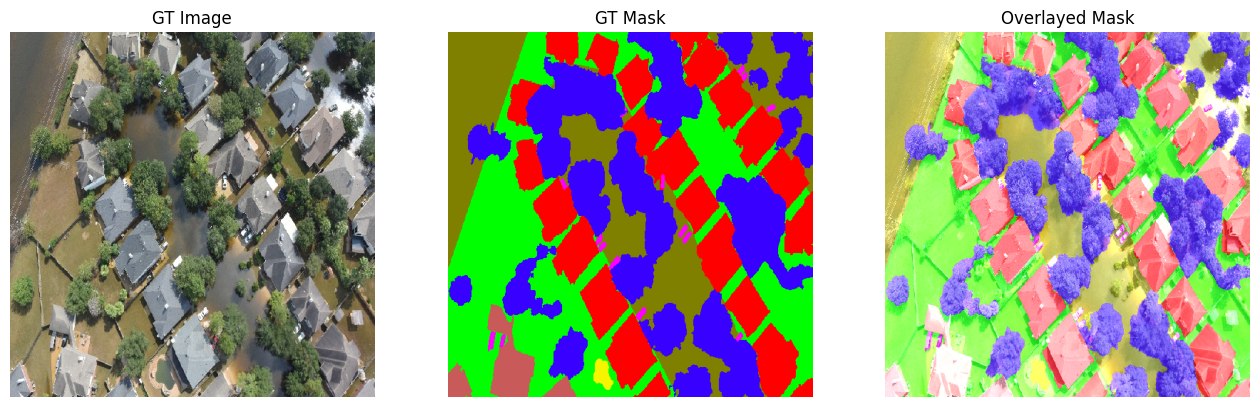

In [ ]:
display_validation_data(val_dataset)

## 3. Loss Function  [5 Points]

<font style="color:red">In this section, you have to implement the loss function you will be using for this dataset.</font>

1. The loss function can be `Cross-entropy`, `focal loss`, `IoU` or `Dice`.
2. You can also use a combination of the above mentioned functions.
3. You can also free to implement and use loss functions not taught in this course.

In [ ]:
@register_keras_serializable()
def dice_coefficient_weighted(y_true, y_pred, smooth=1e-6):
    """
    Computes the class-weighted Dice coefficient using soft predictions.

    Args:
        y_true: One-hot ground truth, shape (B, H, W, C)
        y_pred: Softmax output, shape (B, H, W, C)
        smooth: Smoothing factor to avoid division by zero.

    Returns:
        Scalar Dice coefficient (float32), weighted across classes.
    """
    num_classes = tf.shape(y_pred)[-1]

    # Flatten spatial dimensions
    y_true_flat = tf.reshape(y_true, [-1, num_classes])
    y_pred_flat = tf.reshape(y_pred, [-1, num_classes])

    intersection = tf.reduce_sum(y_true_flat * y_pred_flat, axis=0)
    union = tf.reduce_sum(y_true_flat + y_pred_flat, axis=0)

    dice_per_class = (2.0 * intersection + smooth) / (union + smooth)

    # Apply class weights
    temp_class_weights = (tf.clip_by_value(class_weights, 0.0, tf.reduce_max(class_weights)))
    temp_class_weights /= tf.reduce_sum(temp_class_weights) + 1e-6

    weighted_dice = dice_per_class * temp_class_weights
    total_dice = tf.reduce_sum(weighted_dice)

    # Ensure Dice stays in [0, 1]
    return tf.clip_by_value(total_dice, 0.0, 1.0)


@register_keras_serializable()
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    num_classes = tf.shape(y_pred)[-1]

    if y_true.shape.rank == 4 and y_true.shape[-1] == 1:
        y_true = tf.squeeze(y_true, axis=-1)
    if y_true.shape[-1] != y_pred.shape[-1]:
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), num_classes)

    return dice_coefficient_weighted(y_true, y_pred, smooth=1e-6)


In [ ]:
@register_keras_serializable()
def weighted_cce(y_true, y_pred):
   weights = tf.reduce_sum(class_weights * y_true, axis=-1)
   ce = tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0.05)(y_true, y_pred)
   return tf.reduce_mean(weights * ce)


In [ ]:
@register_keras_serializable()
def focal_tversky_loss(alpha=0.7, beta=0.3, gamma=0.75):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-6, 1.0)
        tp = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
        fp = tf.reduce_sum((1 - y_true) * y_pred, axis=[1, 2, 3])
        fn = tf.reduce_sum(y_true * (1 - y_pred), axis=[1, 2, 3])
        tversky = (tp + 1e-6) / (tp + alpha * fp + beta * fn + 1e-6)
        return tf.reduce_mean((1 - tversky) ** gamma)
    return loss

In [ ]:
@register_keras_serializable()
def dice_loss(y_true, y_pred, smooth=1e-6):
    #print("Dice Loss just before dice coefficient weighted")
    dice = dice_coefficient_weighted(y_true, y_pred, smooth=smooth)
    #print("Dice Loss just after dice coefficient weighted")
    return 1.0 - tf.clip_by_value(dice, 0.0, 1.0)

@register_keras_serializable()
def combined_loss(y_true, y_pred):
    num_classes = tf.shape(y_pred)[-1]

    if y_true.shape.rank == 4 and y_true.shape[-1] == 1:
        y_true = tf.squeeze(y_true, axis=-1)
    if y_true.shape[-1] != y_pred.shape[-1]:
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), num_classes)

    # Clip logits to avoid numerical instability
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)

    #print("Combined Loss just before weighted CCE")
    ce_loss = weighted_cce(y_true, y_pred)
    #print("Combined Loss just after weighted CCE")
    #print("Combined Loss just before Dice Loss")
    d_loss = dice_loss(y_true, y_pred)

    focal_loss = focal_tversky_loss()(y_true, y_pred)

    #print("Combined Loss just after Dice Loss")

    #return ce_loss + d_loss
    return 0.2 * ce_loss + 0.3 * focal_loss + 0.5 * d_loss


## 4. Evaluation Metrics [5 Points]

<font style="color:red">In this section, you have to implement the Dice coefficient evaluation metric.</font>

This competition is evaluated on the mean <a href="https://en.wikipedia.org/wiki/Sørensen–Dice_coefficient" target="_blank">Dice coefficient</a>,  which helps compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by:


<p>$$DSC =  \frac{2 |X \cap Y|}{|X|+ |Y|}$$
$$ \small \mathrm{where}\ X = Predicted\ Set\ of\ Pixels,\ \ Y = Ground\ Truth $$ </p>
<p>The Dice coefficient is defined to be $1$ when both $X$ and $Y$ are empty.</p>



In [ ]:
@register_keras_serializable()
def mean_iou(y_true, y_pred, num_classes=10, smooth=1e-6):
    """
    Computes mean IoU (mIoU) across all classes without using tf.cond or lambdas.

    Args:
        y_true: Tensor of shape (B, H, W) or (B, H, W, 1) — class labels
        y_pred: Tensor of shape (B, H, W, num_classes) — softmax predictions
        num_classes: Total number of classes
        smooth: Small constant to avoid divide-by-zero

    Returns:
        Scalar tensor: mean IoU
    """
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)

    # Ensure shape is (B, H, W, 1)
    if y_true.shape.rank == 3:
        y_true = tf.expand_dims(y_true, axis=-1)

    # Convert to one-hot if not already
    if y_true.shape[-1] != num_classes:
        y_true = tf.squeeze(y_true, axis=-1)
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=num_classes)
    else:
        y_true = tf.cast(y_true, tf.float32)

    # Flatten to (N, C)
    y_true_flat = tf.reshape(y_true, [-1, num_classes])
    y_pred_flat = tf.reshape(y_pred, [-1, num_classes])

    # Intersection and Union
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat, axis=0)
    union = tf.reduce_sum(y_true_flat + y_pred_flat, axis=0) - intersection

    iou = (intersection + smooth) / (union + smooth)
    mean_iou = tf.reduce_mean(iou)

    return mean_iou


## 5. Model [10 Points]

<font style="color:red">In this section you have to define your segmentation model.</font>

In [ ]:
class AdaptiveClassWeighting(tf.keras.callbacks.Callback):
    def __init__(self, val_data, num_classes, loss_fn_template, target_output="main_output", update_every=10, max_batches=30):
        self.val_data = val_data
        self.num_classes = num_classes
        self.loss_fn_template = loss_fn_template
        self.target_output = target_output
        self.update_every = update_every
        self.max_batches = max_batches

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.update_every != 0:
            return

        class_dice_scores = np.zeros(self.num_classes)
        class_counts = np.zeros(self.num_classes)
        batches_processed = 0

        for x_batch, y_batch in self.val_data:
            y_true = y_batch[self.target_output]
            y_pred = self.model.predict(x_batch, verbose=0)

            if isinstance(y_pred, list):
                y_pred = y_pred[0]

            # Compute predicted labels
            y_pred_labels = tf.argmax(y_pred, axis=-1)
            y_true_labels = tf.argmax(y_true, axis=-1)

            for cls in range(self.num_classes):
                y_true_cls = tf.cast(tf.equal(y_true_labels, cls), tf.float32)
                y_pred_cls = tf.cast(tf.equal(y_pred_labels, cls), tf.float32)

                intersection = tf.reduce_sum(y_true_cls * y_pred_cls)
                union = tf.reduce_sum(y_true_cls) + tf.reduce_sum(y_pred_cls)

                dice = (2. * intersection + 1e-6) / (union + 1e-6)
                class_dice_scores[cls] += dice.numpy()
                class_counts[cls] += 1

            batches_processed += 1
            if batches_processed >= self.max_batches:
                break

        # Average dice scores per class
        average_dice_scores = class_dice_scores / (class_counts + 1e-6)

        # Invert dice scores to get weights: lower dice -> higher weight
        inverse_dice = 1.0 - average_dice_scores
        weights = inverse_dice / (np.sum(inverse_dice) + 1e-6)

        # Normalize and assign new weights
        old_weights = class_weights.numpy()

        if tf.is_tensor(weights):
            weights_np = weights.numpy()
        else:
            weights_np = weights # Assume it's already a numpy array

        old_weights = class_weights.numpy()
        new_weights = 0.7 * old_weights + 0.3 * weights_np

        class_weights.assign(new_weights)

        print(f"Updated class weights (from Dice): {class_weights}")
        print(f"Mean Dice used for update: {np.mean(average_dice_scores):.4f}")


In [ ]:
class OLD_SWACallback(tf.keras.callbacks.Callback):
    def __init__(self, swa_start, swa_freq=1):
        super().__init__()
        self.swa_start = swa_start
        self.swa_freq = swa_freq
        self.epoch_counter = 0
        self.swa_weights = None
        self.swa_count = 0

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_counter += 1

        if epoch >= self.swa_start and (epoch - self.swa_start) % self.swa_freq == 0:
            weights = self.model.get_weights()

            if self.swa_weights is None:
                self.swa_weights = [w.copy() for w in weights]
            else:
                for i in range(len(weights)):
                    self.swa_weights[i] = (self.swa_weights[i] * self.swa_count + weights[i]) / (self.swa_count + 1)
            self.swa_count += 1

    def on_train_end(self, logs=None):
        if self.swa_weights:
            print("Applying SWA weights...")
            self.model.set_weights(self.swa_weights)

In [ ]:
class SWACallback(tf.keras.callbacks.Callback):
    def __init__(self, swa_start=75, swa_freq=1, verbose=1):
        super().__init__()
        self.swa_start = swa_start
        self.swa_freq = swa_freq
        self.verbose = verbose
        self.n = 0  # number of models averaged

    def on_epoch_end(self, epoch, logs=None):
        if epoch + 1 >= self.swa_start and (epoch + 1 - self.swa_start) % self.swa_freq == 0:
            weights = self.model.get_weights()
            if self.n == 0:
                self.swa_weights = [w.copy() for w in weights]
            else:
                for i, w in enumerate(weights):
                    self.swa_weights[i] = (self.swa_weights[i] * self.n + w) / (self.n + 1)
            self.n += 1
            if self.verbose:
                print(f"\n➕ SWA: averaged weights at epoch {epoch+1}, total {self.n}")

    def on_train_end(self, logs=None):
        if self.n > 0:
            if self.verbose:
                print("\n📌 SWA: applying averaged weights.")
            self.model.set_weights(self.swa_weights)

            # Recalibrate BatchNorm - Removed due to compatibility issues
            # for layer in self.model.layers:
            #     if isinstance(layer, tf.keras.layers.BatchNormalization):
            #         layer.moving_mean.assign(tf.zeros_like(layer.moving_mean))
            #         layer.moving_variance.assign(tf.ones_like(layer.moving_variance))
            # # Single pass through training data
            # try:
            #     train_data = self.model._train_counter  # fallback
            # except:
            #     train_data = None
            # for x, y in self.model.train_function.inputs: pass  # skip internal
            # # Use model.fit with lr=0 to update BN
            # self.model.fit(
            #     self.model.history.model._train_counter, epochs=1,
            #     verbose=self.verbose, shuffle=False
            # )

In [ ]:
class EpochUpdaterCallback(tf.keras.callbacks.Callback):
    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_begin(self, epoch, logs=None):
        self.dataset.set_epoch(epoch)

In [ ]:
input_shape = (DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH, DatasetConfig.IMG_CHANNELS)
num_classes = DatasetConfig.NUM_CLASSES

In [ ]:
def spatial_attention(x):
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)  # Change this line
    concat = layers.Concatenate()([avg_pool, max_pool])
    attention = layers.Dense(x.shape[-1], activation='sigmoid')(concat) # Change this line
    attention = layers.Reshape((1, 1, x.shape[-1]))(attention) # Change this line
    return x * attention

In [ ]:
def se_block(x, ratio=8):
    channels = x.shape[-1]
    squeeze = layers.GlobalAveragePooling2D()(x)
    excitation = layers.Dense(channels // ratio, activation='relu')(squeeze)
    excitation = layers.Dense(channels, activation='sigmoid')(excitation)
    excitation = layers.Reshape((1, 1, channels))(excitation)
    return layers.Multiply()([x, excitation])


In [ ]:
def cbam(x, reduction_ratio=16):
    channel = x.shape[-1]

    # ----- Channel Attention -----
    avg_pool = layers.GlobalAveragePooling2D(keepdims=True)(x)  # (None, 1, 1, C)
    max_pool = layers.GlobalMaxPooling2D(keepdims=True)(x)      # (None, 1, 1, C)

    shared_dense_one = layers.Dense(channel // reduction_ratio, activation='relu', use_bias=True)
    shared_dense_two = layers.Dense(channel, activation='sigmoid', use_bias=True)

    avg_out = shared_dense_one(avg_pool)
    avg_out = shared_dense_two(avg_out)

    max_out = shared_dense_one(max_pool)
    max_out = shared_dense_two(max_out)

    channel_attention = layers.Add()([avg_out, max_out])

    x = layers.Multiply()([x, channel_attention])

    # ----- Spatial Attention -----
    # Average pooling along channels
    avg_pool_spatial = layers.Conv2D(
        filters=1,
        kernel_size=1,
        strides=1,
        padding='same',
        use_bias=False
    )(x)

    # Max pooling along channels
    max_pool_spatial = layers.Conv2D(
        filters=1,
        kernel_size=1,
        strides=1,
        padding='same',
        use_bias=False
    )(x)

    concat = layers.Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

    spatial_attention = layers.Conv2D(
        filters=1,
        kernel_size=7,
        strides=1,
        padding='same',
        activation='sigmoid',
        use_bias=False
    )(concat)

    x = layers.Multiply()([x, spatial_attention])

    return x

In [ ]:
from tensorflow.keras import layers

def FOO_cbam(x, reduction_ratio=16, name=None):
    input_tensor = x  # Save for residual connection
    channel = x.shape[-1]

    # ----- Channel Attention -----
    avg_pool = layers.GlobalAveragePooling2D(keepdims=True)(x)
    max_pool = layers.GlobalMaxPooling2D(keepdims=True)(x)

    shared_dense_1 = layers.Dense(channel // reduction_ratio, activation='relu', use_bias=True)
    shared_dense_2 = layers.Dense(channel, activation='sigmoid', use_bias=True)

    avg_fc = shared_dense_2(shared_dense_1(avg_pool))
    max_fc = shared_dense_2(shared_dense_1(max_pool))

    channel_attention = layers.Add()([avg_fc, max_fc])
    x = layers.Multiply()([x, channel_attention])

    # ----- Spatial Attention (Learnable Channel Fusion) -----
    compress = layers.Conv2D(filters=2, kernel_size=1, padding='same', use_bias=True)(x)
    compress = layers.BatchNormalization()(compress)
    compress = layers.Activation('relu')(compress)

    spatial_attention = layers.Conv2D(filters=1, kernel_size=7, padding='same', activation='sigmoid', use_bias=False)(compress)
    x = layers.Multiply()([x, spatial_attention])

    # ----- Residual Connection -----
    if input_tensor.shape[-1] != x.shape[-1]:
        input_tensor = layers.Conv2D(filters=x.shape[-1], kernel_size=1, padding='same', use_bias=False)(input_tensor)
    x = layers.Add()([x, input_tensor])

    return x


In [ ]:
def scse_block(x):
    cse = se_block(x)
    sse = layers.Conv2D(1, 1, activation='sigmoid')(x)
    sse = layers.Multiply()([x, sse])
    return layers.Add()([cse, sse])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def gau_plus_block(x, gating_channels=256, reduction=16, name=None):
    """
    GAU++ block using only standard Keras layers (no lambdas or TF ops).

    Args:
        x: Input tensor of shape (B, H, W, C)
        gating_channels: Output channels for attention alignment
        reduction: Reduction ratio for channel attention
        name: Optional base name for layers

    Returns:
        Output tensor after GAU++ block
    """
    input_channels = x.shape[-1]
    shortcut = x

    # ----- Channel Attention -----
    gap = layers.GlobalAveragePooling2D(keepdims=True)(x)
    gap = layers.Conv2D(gating_channels // reduction, 1, activation='relu', use_bias=True)(gap)
    gap = layers.Conv2D(gating_channels, 1, activation='sigmoid', use_bias=True)(gap)

    x_aligned = layers.Conv2D(gating_channels, 1, padding='same', use_bias=False)(x)
    x_aligned = layers.BatchNormalization()(x_aligned)
    channel_att = layers.Multiply()([x_aligned, gap])

    # ----- Spatial Attention via AveragePooling and MaxPooling -----
    avg_pool = layers.AveragePooling2D(pool_size=1, strides=1, padding='same')(channel_att)
    max_pool = layers.MaxPooling2D(pool_size=1, strides=1, padding='same')(channel_att)

    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool])

    spatial_gate = layers.Conv2D(1, 7, padding='same', activation='sigmoid')(concat)
    spatial_att = layers.Multiply()([channel_att, spatial_gate])

    # ----- Final Fusion -----
    fused = layers.Conv2D(input_channels, 1, padding='same', use_bias=False)(spatial_att)
    fused = layers.BatchNormalization()(fused)

    out = layers.Add()([shortcut, fused])
    out = layers.Activation('relu')(out)

    return out


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def fpa_block(x, filters=256, name=None):
    """
    Feature Pyramid Attention (FPA) Block

    Args:
        x: Input tensor (B, H, W, C)
        filters: Number of filters for internal conv layers
        name: Optional base name for layers

    Returns:
        Tensor after FPA processing
    """
    input_shape = tf.keras.backend.int_shape(x)
    height, width = input_shape[1], input_shape[2]

    # Global pooling branch
    gp = layers.GlobalAveragePooling2D()(x)
    gp = layers.Reshape((1, 1, -1))(gp)
    gp = layers.Conv2D(filters, 1, use_bias=False)(gp)
    gp = layers.BatchNormalization()(gp)
    gp = layers.Activation("relu")(gp)
    gp = layers.UpSampling2D(size=(height, width), interpolation='bilinear')(gp)

    # Pyramid branches
    conv7 = layers.Conv2D(filters, 7, padding='same', use_bias=False)(x)
    conv7 = layers.BatchNormalization()(conv7)
    conv7 = layers.Activation("relu")(conv7)

    conv5 = layers.Conv2D(filters, 5, padding='same', use_bias=False)(conv7)
    conv5 = layers.BatchNormalization()(conv5)
    conv5 = layers.Activation("relu")(conv5)

    conv3 = layers.Conv2D(filters, 3, padding='same', use_bias=False)(conv5)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.Activation("relu")(conv3)

    # Combine all
    merged = layers.Add()([gp, conv3])
    out = layers.Conv2D(filters, 1, padding="same", use_bias=False)(merged)
    out = layers.BatchNormalization()(out)
    out = layers.Activation("relu")(out)

    return out


In [ ]:
def aspp(x):
    dims = x.shape
    pool = layers.GlobalAveragePooling2D()(x)
    pool = layers.Reshape((1, 1, dims[-1]))(pool)
    pool = layers.Conv2D(256, 1, padding="same", use_bias=False)(pool)
    pool = layers.BatchNormalization()(pool)
    pool = layers.Activation("relu")(pool)
    pool = layers.UpSampling2D(size=(dims[1], dims[2]), interpolation="bilinear")(pool)

    conv1 = layers.Conv2D(256, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    conv3 = layers.Conv2D(256, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    conv6 = layers.Conv2D(256, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    conv9 = layers.Conv2D(256, 3, dilation_rate=18, padding="same", use_bias=False)(x)

    concat = layers.Concatenate()([pool, conv1, conv3, conv6, conv9])
    output = layers.Conv2D(256, 1, padding="same", use_bias=False)(concat)
    output = layers.BatchNormalization()(output)
    return layers.Activation("relu")(output)

In [ ]:
def r_aspp_block(x, filters=256, dilation_rates=[1, 6, 12, 18]):
    """Residual ASPP block."""
    aspp_outs = []
    for rate in dilation_rates:
        out = layers.Conv2D(filters, 3, padding='same', dilation_rate=rate, use_bias=False)(x)
        out = layers.BatchNormalization()(out)
        out = layers.ReLU()(out)
        aspp_outs.append(out)
    concat = layers.Concatenate()(aspp_outs)
    fused = layers.Conv2D(filters, 1, padding='same', use_bias=False)(concat)
    fused = layers.BatchNormalization()(fused)
    fused = layers.ReLU()(fused)

    # Residual projection
    res = layers.Conv2D(filters, 1, padding='same', use_bias=False)(x)
    res = layers.BatchNormalization()(res)
    return layers.Add()([res, fused])


In [ ]:

def dense_aspp_block(x, filters=256, dilation_rates=[3, 6, 12, 18, 24]):
    """DenseASPP block."""
    outputs = [x]
    for rate in dilation_rates:
        x_in = layers.Concatenate()(outputs)
        x_out = layers.Conv2D(filters, 3, padding='same', dilation_rate=rate, use_bias=False)(x_in)
        x_out = layers.BatchNormalization()(x_out)
        x_out = layers.ReLU()(x_out)
        outputs.append(x_out)
    return layers.Concatenate()(outputs[1:])  # skip original input

In [ ]:
def fpa_aspp_hybrid(x, aspp_blk=r_aspp_block, filters=256, name="fpa_aspp"):
    # ----- FPA Branch -----
    fpa = layers.Conv2D(filters, 7, padding='same', use_bias=False)(x)
    fpa = layers.BatchNormalization()(fpa)
    fpa = layers.Activation('relu')(fpa)

    fpa = layers.Conv2D(filters, 5, padding='same', use_bias=False)(fpa)
    fpa = layers.BatchNormalization()(fpa)
    fpa = layers.Activation('relu')(fpa)

    fpa = layers.Conv2D(filters, 3, padding='same', use_bias=False)(fpa)
    fpa = layers.BatchNormalization()(fpa)
    fpa = layers.Activation('relu')(fpa)

    # ----- ASPP Branch -----
    aspp = aspp_blk(x)

    # ----- Fuse ASPP and FPA -----
    out = layers.Concatenate()([fpa, aspp])
    out = layers.Conv2D(filters, 1, padding="same", use_bias=False)(out)
    out = layers.BatchNormalization()(out)
    out = layers.Activation("relu")(out)

    return out


In [ ]:
aspp_block = aspp

In [ ]:
spatial_attention_block = se_block

In [ ]:
cbam_block = cbam

In [ ]:
def upsample_to_input_static(x, input_shape=(256, 256), current_shape=(32, 32)):
    """
    Progressive bilinear upsampling from current_shape to input_shape.
    """
    h_steps = int(np.log2(input_shape[0] // current_shape[0]))
    w_steps = int(np.log2(input_shape[1] // current_shape[1]))

    for _ in range(max(h_steps, w_steps)):
        x = layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(x)

    return x

In [ ]:
def dual_attention_module(x, filters):
    # Position attention
    pos = layers.Conv2D(filters, 1, padding="same")(x)
    pos = layers.BatchNormalization()(pos)
    pos = layers.Activation("relu")(pos)

    # Channel attention
    gap = layers.GlobalAveragePooling2D()(x)
    gap = layers.Dense(filters, activation="relu")(gap)
    gap = layers.Dense(filters, activation="sigmoid")(gap)
    gap = layers.Reshape((1, 1, filters))(gap)

    out = layers.Multiply()([pos, gap])
    return layers.Add()([x, out])

In [ ]:
def dense_aspp(x, filters=256):
    rates = [3, 6, 12, 18]
    outputs = [x]
    for r in rates:
        conv = layers.Conv2D(filters, 3, padding='same', dilation_rate=r, activation='relu')(outputs[-1])
        outputs.append(conv)
    return layers.Concatenate()(outputs[1:])

In [ ]:
def residual_block(x, filters):
    shortcut = x

    # Add a 1x1 convolution to the shortcut if the number of filters changes
    # to match the shape for the Add operation.
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, padding="same")(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([shortcut, x])
    x = layers.ReLU()(x)
    return x

In [ ]:
def conv_bn_relu(x, filters, kernel=3):
    x = layers.Conv2D(filters, kernel, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    return layers.ReLU()(x)


In [ ]:
def OLD_progressive_decoder(aspp_output, low_feat, mid_feat, high_feat):
    # 1/32 → 1/16 + high
    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(aspp_output)
    high_feat = conv_bn_relu(high_feat, 128)
    x = layers.Concatenate()([x, high_feat])
    x = conv_bn_relu(x, 256)
    high_out = x

    # 1/16 → 1/8 + mid
    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x)
    mid_feat = conv_bn_relu(mid_feat, 64)
    x = layers.Concatenate()([x, mid_feat])
    x = conv_bn_relu(x, 128)
    mid_out = x

    # 1/8 → 1/4 + low
    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x)
    low_feat = conv_bn_relu(low_feat, 48)
    x = layers.Concatenate()([x, low_feat])
    x = conv_bn_relu(x, 64)
    low_out = x


    # Final processing
    x = conv_bn_relu(x, 64)
    return x, low_out, mid_out, high_out

In [ ]:
##def progressive_decoder(aspp_output, low_feat, mid_feat, high_feat, shallow_feat, mid_high_feat):
def progressive_decoder(aspp_output, low_feat, mid_feat, high_feat, mid_high_feat):
    # ASPP output is 1/32 resolution
    # Upsample to 1/16 and concatenate with high_feat
    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(aspp_output)
    high_feat = conv_bn_relu(high_feat, 128)
    x = layers.Concatenate()([x, high_feat])
    x = conv_bn_relu(x, 256)
    high_out = x

    # 1/16 → 1/12 (approximate) to match mid_high_feat
    x = layers.UpSampling2D(size=(1, 1), interpolation='bilinear')(x)  # Keep resolution or adjust as needed
    mid_high_feat = conv_bn_relu(mid_high_feat, 128)
    x = layers.Concatenate()([x, mid_high_feat])
    x = conv_bn_relu(x, 256)
    mid_high_out = x

    # 1/12 → 1/8
    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x)
    mid_feat = conv_bn_relu(mid_feat, 64)
    x = layers.Concatenate()([x, mid_feat])
    x = conv_bn_relu(x, 128)
    mid_out = x

    # 1/8 → 1/4
    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x)
    low_feat = conv_bn_relu(low_feat, 48)
    x = layers.Concatenate()([x, low_feat])
    x = conv_bn_relu(x, 64)
    low_out = x

    # 1/4 → 1/2
##    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x)
##    shallow_feat = conv_bn_relu(shallow_feat, 32)
##    x = layers.Concatenate()([x, shallow_feat])
##    x = conv_bn_relu(x, 64)
##    shallow_out = x

    # Final refinement (still at 1/2 scale unless you upsample again externally)
    x = conv_bn_relu(x, 64)

##    return x, low_out, mid_out, high_out, shallow_out, mid_high_out
    return x, low_out, mid_out, high_out, mid_high_out

In [ ]:
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x


In [ ]:
def improved_edge_decoder(low_feat, mid_feat, high_feat, input_shape=(256, 256), filters=64):
    """
    Enhanced edge decoder that fuses low and mid-level features,
    uses attention, and outputs a sharp edge map.
    """

    # Process low-level feature
    low = conv_bn_relu(low_feat, filters)
    low = layers.UpSampling2D(size=2, interpolation="bilinear")(low)

    # Process mid-level feature
    mid = conv_bn_relu(mid_feat, filters)
    mid = layers.UpSampling2D(size=4, interpolation="bilinear")(mid)

    # Process high-level feature
    high = conv_bn_relu(high_feat, filters)
    high = layers.UpSampling2D(size=8, interpolation="bilinear")(high)

    # Fuse and refine
    x = layers.Concatenate()([low, mid, high])
    #x = cbam_block(x)

    x = conv_bn_relu(x, filters)
    x = conv_bn_relu(x, filters)

    return x

In [ ]:

def swin_block(x, num_heads=4, key_dim=32, mlp_ratio=4, dropout=0.0, name=None):
    input_tensor = x

    # ----- Layer Norm + Multi-Head Attention -----
    x = layers.LayerNormalization()(x)

    # Flatten spatial dimensions
    shape = x.shape
    H, W, C = shape[1], shape[2], shape[3]
    x_flat = layers.Reshape((H * W, C))(x)

    # Self-attention
    attn_out = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, dropout=dropout)(x_flat, x_flat)

    # Restore spatial dimensions
    attn_out = layers.Reshape((H, W, C))(attn_out)

    # Residual connection
    x = layers.Add()([input_tensor, attn_out])

    # ----- Feed-Forward Network -----
    ffn_input = x
    x = layers.LayerNormalization()(x)
    x = layers.Conv2D(C * mlp_ratio, kernel_size=1, activation='gelu')(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv2D(C, kernel_size=1)(x)
    x = layers.Dropout(dropout)(x)

    # Residual connection
    x = layers.Add()([ffn_input, x])

    return x

In [ ]:
def receptive_field_block(input_tensor, filters=512, name="RFB"):
    """Receptive Field Block module."""
    inter_channels = filters // 4
    branches = []

    # Branch 1: simple 1x1 conv
    b1 = layers.Conv2D(inter_channels, 1, padding="same", activation="relu",
                       name=f"{name}_b1_1x1")(input_tensor)
    branches.append(b1)

    # Branch 2: 1x1 → 1×3 → 3×1 → 3×3 dilation=3
    b2 = layers.Conv2D(inter_channels, 1, padding="same", activation="relu",
                       name=f"{name}_b2_1x1")(input_tensor)
    b2 = layers.Conv2D(inter_channels, (1,3), padding="same", activation="relu",
                       name=f"{name}_b2_1x3")(b2)
    b2 = layers.Conv2D(inter_channels, (3,1), padding="same", activation="relu",
                       name=f"{name}_b2_3x1")(b2)
    b2 = layers.Conv2D(inter_channels, (3,3), padding="same", activation="relu",
                       dilation_rate=3, name=f"{name}_b2_3x3d3")(b2)
    branches.append(b2)

    # Branch 3: 1x1 → 1×5 → 5×1 → 3×3 dilation=5
    b3 = layers.Conv2D(inter_channels, 1, padding="same", activation="relu",
                       name=f"{name}_b3_1x1")(input_tensor)
    b3 = layers.Conv2D(inter_channels, (1,5), padding="same", activation="relu",
                       name=f"{name}_b3_1x5")(b3)
    b3 = layers.Conv2D(inter_channels, (5,1), padding="same", activation="relu",
                       name=f"{name}_b3_5x1")(b3)
    b3 = layers.Conv2D(inter_channels, (3,3), padding="same", activation="relu",
                       dilation_rate=5, name=f"{name}_b3_3x3d5")(b3)
    branches.append(b3)

    # Branch 4: 1x1 → pooling → 1x1 → 3×3 dilation=7
    b4 = layers.AveragePooling2D(pool_size=3, strides=1, padding="same",
                                 name=f"{name}_b4_pool")(input_tensor)
    b4 = layers.Conv2D(inter_channels, 1, padding="same", activation="relu",
                       name=f"{name}_b4_1x1")(b4)
    b4 = layers.Conv2D(inter_channels, (3,3), padding="same", activation="relu",
                       dilation_rate=7, name=f"{name}_b4_3x3d7")(b4)
    branches.append(b4)

    # Concatenate branches and fuse
    concat = layers.Concatenate(name=f"{name}_concat")(branches)
    fused = layers.Conv2D(filters, 3, padding="same", activation="relu",
                          name=f"{name}_fuse")(concat)

    # Add residual connection
    residual = layers.Conv2D(filters, 1, padding="same", name=f"{name}_residual")(input_tensor)
    out = layers.Add(name=f"{name}_output")([fused, residual])
    return layers.ReLU(name=f"{name}_relu")(out)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2S

def create_deeplabv3_plus_efficient(input_shape=(256, 256, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    base_model = EfficientNetV2S(include_top=False, weights="imagenet", input_tensor=inputs)

    for layer in base_model.layers:
        layer.trainable = True

    # Encoder feature maps
##    shallow_feat = base_model.get_layer("block1b_add").output  # 1/2
    low_feat = base_model.get_layer("block2b_add").output   # 1/4
    mid_feat = base_model.get_layer("block3b_add").output   # 1/8
    mid_high_feat = base_model.get_layer("block4f_add").output  # 1/12 or so
    high_feat = base_model.get_layer("block4c_add").output  # 1/16
    encoder_output = base_model.get_layer("top_activation").output  # 1/32

    # ASPP
    x = aspp(encoder_output)
    aspp_output = x

    # Decoder with progressive multi-level fusion
##    x, low_out, mid_out, high_out, shallow_out, mid_high_out = progressive_decoder(x, low_feat, mid_feat, high_feat, shallow_feat, mid_high_feat)
    x, low_out, mid_out, high_out, mid_high_out = progressive_decoder(x, low_feat, mid_feat, high_feat, mid_high_feat)
    x = layers.SpatialDropout2D(0.2)(x)

   # Final upsample to input resolution
    main_output = upsample_to_input_static(x, input_shape=input_shape, current_shape=(x.shape[1], x.shape[2]))
    main_output = layers.Conv2D(num_classes, 1, padding="same", activation="softmax", name="main_output")(main_output)

##    shallow_out_upsampled = upsample_to_input_static(shallow_feat, input_shape=input_shape, current_shape=(shallow_feat.shape[1], shallow_feat.shape[2]))
##    shallow_output = layers.Conv2D(num_classes, 1, activation='softmax', name='shallow_output')(shallow_out_upsampled)

    # Low output (1/4 -> upsample)
    low_out_upsampled = upsample_to_input_static(low_out, input_shape=input_shape, current_shape=(low_out.shape[1], low_out.shape[2]))
    low_output = layers.Conv2D(num_classes, 1, activation='softmax', name='low_output')(low_out_upsampled)

    # Mid output (1/8 -> upsample)
    mid_out_upsampled = upsample_to_input_static(mid_out, input_shape=input_shape, current_shape=(mid_out.shape[1], mid_out.shape[2]))
    mid_output = layers.Conv2D(num_classes, 1, activation='softmax', name='mid_output')(mid_out_upsampled)

    mid_high_upsampled = upsample_to_input_static(mid_high_feat, input_shape=input_shape, current_shape=(mid_high_feat.shape[1], mid_high_feat.shape[2]))
    mid_high_output = layers.Conv2D(num_classes, 1, activation='softmax', name='mid_high_output')(mid_high_upsampled)

    # High output (1/16 -> upsample)
    high_out_upsampled = upsample_to_input_static(high_out, input_shape=input_shape, current_shape=(high_out.shape[1], high_out.shape[2]))
    high_output = layers.Conv2D(num_classes, 1, activation='softmax', name='high_output')(high_out_upsampled)

    # Edge output from low-level
    edge = layers.Conv2D(64, 3, padding="same", activation="relu")(low_feat)
    edge = upsample_to_input_static(edge, input_shape=input_shape, current_shape=(edge.shape[1], edge.shape[2]))
    edge_output = layers.Conv2D(1, 1, activation="sigmoid", name="edge_output_upsample")(edge)

    # Side output from ASPP for deep supervision
    side_output = upsample_to_input_static(aspp_output, input_shape=input_shape, current_shape=(aspp_output.shape[1], aspp_output.shape[2]))
    side_output = layers.Conv2D(num_classes, 1, padding="same", activation="softmax", name="side_output_upsample")(side_output)

#    return Model(inputs=inputs, outputs=[main_output, edge, side_output])
##    return Model(inputs=inputs, outputs=[main_output, edge_output, side_output, mid_output, high_output, shallow_output, low_output, mid_high_output])
    return Model(inputs=inputs, outputs=[main_output, edge_output, side_output, mid_output, high_output, low_output, mid_high_output])

In [ ]:
create_model = create_deeplabv3_plus_efficient

## 6. Train and Plot Results [7 Points]

<font style="color:red">In this section you have to:</font>
    
1. Implement the training pipeline.

2. Train the model.

3. Plot loss and metrics for training and validation set.


In [ ]:
deeplab = create_model(input_shape, num_classes)

# Define Cosine Decay with Warm Restarts schedule
#lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
#    initial_learning_rate=1e-3,  # Starting learning rate
#    first_decay_steps=10,       # Number of steps before first restart
#    t_mul=2.0,                  # Multiplier for decay cycle length (doubles each cycle)
#    m_mul=1.0,                  # Multiplier for learning rate decay (keeps peak same)
#    alpha=1e-5                  # Final learning rate value at the end of a decay cycle
#)

#optimizer = tf.keras.optimizers.AdamW(learning_rate=lr_schedule)

optimizer = tf.keras.optimizers.AdamW(learning_rate=TrainingConfig.LEARNING_RATE, weight_decay=1e-5)

# SWA Parameters
SWA_START_EPOCH = 20
SWA_FREQ = 2  # Update every 2 epochs


# Compile the model with the specified loss and metrics
custom_objects={'mean_iou':mean_iou, 'dice_coefficient': dice_coefficient, 'combined_loss': combined_loss}

#deeplab.compile(optimizer=optimizer,
#    loss=combined_loss,
#    metrics=['accuracy', mean_iou, dice_coefficient]) # Use dice_coefficient and mean_iou as a metric

deeplab.compile(
    optimizer=optimizer,
#    loss=deep_supervision_loss,
    loss={
        'main_output': combined_loss,
#        "edge_output_upsample": edge_loss,
        "edge_output_upsample": 'binary_crossentropy',
#        "side_output_upsample": combined_loss, # Changed 'side_aspp' to 'side_output_upsample' to match model output
        "side_output_upsample": 'categorical_crossentropy',
        "mid_output": 'categorical_crossentropy',
        "high_output": 'categorical_crossentropy',
##        "shallow_output": 'categorical_crossentropy',
        "low_output": 'categorical_crossentropy',
        "mid_high_output": 'categorical_crossentropy',
    },
    loss_weights={
        'main_output': 1.0,
        "edge_output_upsample": 0.2,
#        "side_output_upsample": 0.2,
        "side_output_upsample": 0.5,
        "mid_output": 0.2,
        "high_output": 0.2,
##        "shallow_output": 0.2,
        "low_output": 0.2,
        "mid_high_output": 0.2,
    },
    metrics={
        'main_output': [
            'accuracy',
            dice_coefficient, # Assuming this metric works with the one-hot main output
            mean_iou,
        ],
        'edge_output_upsample': [
             tf.keras.metrics.BinaryAccuracy(), # Use BinaryAccuracy for the edge output
        ],
         'side_output_upsample': [],
         'mid_output': [],
         'high_output': [],
##         'shallow_output': [],
         'low_output': [],
         'mid_high_output': [],
    }
)

print("Model outputs:", deeplab.outputs)
print("Number of outputs:", len(deeplab.outputs))


Model outputs: [<KerasTensor shape=(None, 512, 512, 10), dtype=float32, sparse=False, name=keras_tensor_565>, <KerasTensor shape=(None, 512, 512, 1), dtype=float32, sparse=False, name=keras_tensor_586>, <KerasTensor shape=(None, 512, 512, 10), dtype=float32, sparse=False, name=keras_tensor_592>, <KerasTensor shape=(None, 512, 512, 10), dtype=float32, sparse=False, name=keras_tensor_572>, <KerasTensor shape=(None, 512, 512, 10), dtype=float32, sparse=False, name=keras_tensor_582>, <KerasTensor shape=(None, 512, 512, 10), dtype=float32, sparse=False, name=keras_tensor_568>, <KerasTensor shape=(None, 512, 512, 10), dtype=float32, sparse=False, name=keras_tensor_577>]
Number of outputs: 7


In [ ]:
def get_callbacks(
    training_config=TrainingConfig(),
    model_name="model",
    monitor="val_loss",
    mode="min",
    save_weights_only=False,
    save_best_only=True,
    adaptive_loss_function=weighted_cce,
):

    # Initialize tensorboard callback for logging.
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=training_config.log_dir,
        histogram_freq=20,
        write_graph=True,
        update_freq="epoch",
        write_images=True,
    )


    checkpoint_filepath = training_config.checkpoint_path

    # Update file path if saving best model weights.
    if save_weights_only:
        checkpoint_filepath = os.path.join(checkpoint_filepath, "model.ckpt")
    else:
        checkpoint_filepath = os.path.join(checkpoint_filepath, "epoch_{epoch:02d}_valloss_{val_loss:.4f}.keras")
#        checkpoint_filepath = os.path.join(checkpoint_filepath, "epoch_{epoch:02d}_metric_{val_main_output_dice_coefficient:.4f}.keras")

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor=monitor,     # or "val_loss"
        mode=mode,             # use "min" if you're monitoring loss
        save_best_only=False,   # Save all checkpoints so we can sort them later
        verbose=1,
    )

    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
        monitor=monitor,
        patience=10,
        verbose=1,
        factor=0.25,
        min_lr=0.00001,
    )

    earlyStopping = tf.keras.callbacks.EarlyStopping(
        monitor=monitor,
        patience=20,
        verbose=1,
        restore_best_weights=True,
        mode=mode,  # Explicitly set the mode here
    )

    adaptive_weight_cb = AdaptiveClassWeighting(
        val_data=val_dataset,
        num_classes=10,
        loss_fn_template=adaptive_loss_function
    )

    epoch_updater = EpochUpdaterCallback(train_dataset)

    swa_callback = SWACallback(swa_start=SWA_START_EPOCH, swa_freq=SWA_FREQ)

    #return [tensorboard_callback, model_checkpoint_callback, learning_rate_reduction, adaptive_weight_cb]
    #return [tensorboard_callback, model_checkpoint_callback, learning_rate_reduction]

    return [model_checkpoint_callback, learning_rate_reduction, epoch_updater]
#    return [model_checkpoint_callback, learning_rate_reduction, epoch_updater]

In [ ]:
import os
import re
import heapq

def get_top_n_models(checkpoint_dir, n=3, metric="valloss", mode="min"):
    pattern = re.compile(rf"epoch_\d+_valloss_(\d+\.\d+)\.keras")
    #pattern = re.compile(rf"epoch_\d+_metric_(\d+\.\d+)\.keras")
    scored_models = []

    # Ensure checkpoint_dir exists
    if not os.path.isdir(checkpoint_dir):
        print(f"Error: Checkpoint directory not found at {checkpoint_dir}")
        return []

    for fname in os.listdir(checkpoint_dir):
        match = pattern.match(fname)
        if match:
            score = float(match.group(1))
            path = os.path.join(checkpoint_dir, fname)
            scored_models.append((score, path))

    # Sort by score descending for 'valloss' (lower is better), assuming 'valloss' is the metric
    # If the metric is something like 'val_main_output_mean_iou' where higher is better,
    # we should sort ascending. Let's assume 'valloss' means lower is better for now.
    # If the metric implies higher is better (e.g., accuracy, IoU, Dice), use heapq.nlargest
    # If the metric implies lower is better (e.g., loss), use heapq.nsmallest
    # Based on the pattern `valloss_(\d+\.\d+)`, it seems we are looking for the lowest loss.
    if mode == "min":
      top_models = heapq.nsmallest(n, scored_models, key=lambda x: x[0])
    else:
      top_models = heapq.nlargest(n, scored_models, key=lambda x: x[0])

    print(f"Found top {len(top_models)} models based on '{metric}':")
    for score, path in top_models:
        print(f"  Score: {score:.4f}, Path: {path}")

    return [path for score, path in top_models]

In [ ]:
def setup_log_directory(training_config=TrainingConfig(), model_name='model'):
    '''Tensorboard Log, Model checkpoint directory Setup and Early stopping'''

    get_number = lambda path: path.replace(".keras", "").replace("version_", "")

    model_root_dir = training_config.root_log_dir
    model_checkpoint_dir = training_config.root_checkpoint_dir

    if os.path.isdir(model_root_dir) and os.listdir(model_root_dir): # Check if directory exists and is not empty
        # Get all folders numbers in the root_log_dir
        folder_numbers = [int(get_number(folder)) for folder in os.listdir(model_root_dir)]

        # Find the latest version number present in the log_dir
        last_version_number = max(folder_numbers)

        # New version name
        version_name = f"version_{last_version_number + 1}"

    else:
        version_name = training_config.log_dir

    # Update the training config default directory
    training_config.log_dir        = os.path.join(model_root_dir, version_name)
    training_config.checkpoint_path = os.path.join(model_checkpoint_dir, version_name)

    # Create new directory for saving new experiment version
    os.makedirs(model_root_dir, exist_ok=True)
    os.makedirs(model_checkpoint_dir, exist_ok=True)
    os.makedirs(training_config.log_dir, exist_ok=True)
    os.makedirs(training_config.checkpoint_path, exist_ok=True)

    print(f"Logging at: {model_root_dir}")
    print(f"Model Checkpoint at: {model_checkpoint_dir}")
    print(f"Model Checkpoint path: {training_config.checkpoint_path}")

    return training_config, version_name

In [ ]:
training_config = TrainingConfig()

In [ ]:
if load_version == None:
  # Tensorboard Log and model checkpoint Setup.
  training_config, current_version_name = setup_log_directory(training_config, deeplab.name)

  # Get training callbacks
  #deeplab_callbacks = get_callbacks(training_config, monitor="val_main_output_loss", mode="min")
  #deeplab_callbacks = get_callbacks(training_config, monitor="val_main_output_mean_iou", mode="max")
  deeplab_callbacks = get_callbacks(training_config)
  #deeplab_callbacks = get_callbacks(training_config, monitor="val_main_output_dice_coefficient", mode="max")

  history = deeplab.fit(train_dataset, epochs=TrainingConfig.EPOCHS, verbose=1,
                    validation_data=val_dataset,
                    callbacks=deeplab_callbacks,
                   )

Logging at: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_logs
Model Checkpoint at: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints
Model Checkpoint path: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148
Epoch 1/101
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - edge_output_upsample_binary_accuracy: 0.9362 - edge_output_upsample_loss: 0.2575 - high_output_loss: 1.5313 - loss: 3.6966 - low_output_loss: 1.7196 - main_output_accuracy: 0.3936 - main_output_dice_coefficient: 0.0285 - main_output_loss: 0.7940 - main_output_mean_iou: 0.0905 - mid_high_output_loss: 5.3608 - mid_output_loss: 1.5835 - side_output_upsample_loss: 1.6240
Epoch 1: saving model to /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148/epoch_01_valloss_2.0606.keras
368/368 ━━━━━━━━━━━━━━━━━━━━ 3022s 8s/step - edge_output_upsample_binary_acc

In [ ]:
def plot_results(metrics, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(18, 5))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show(block=block_plot)
    plt.close()

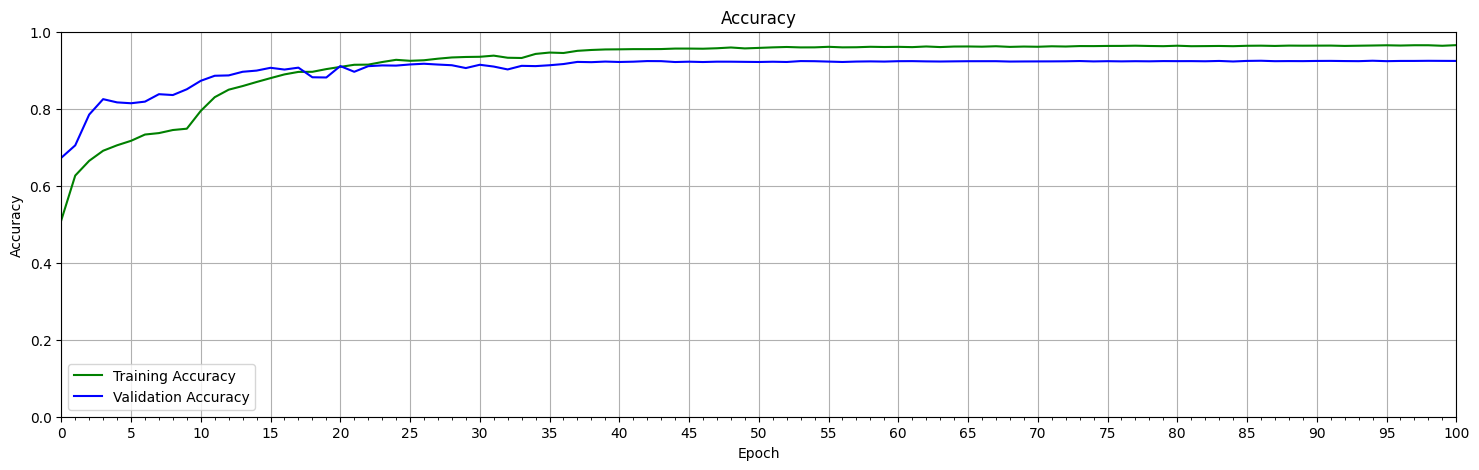

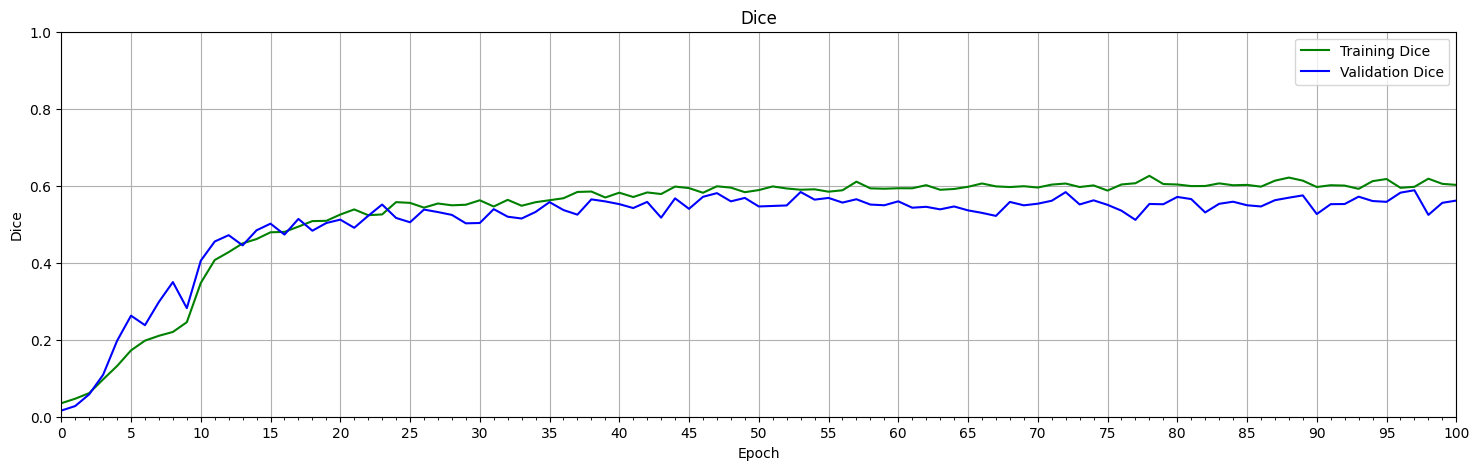

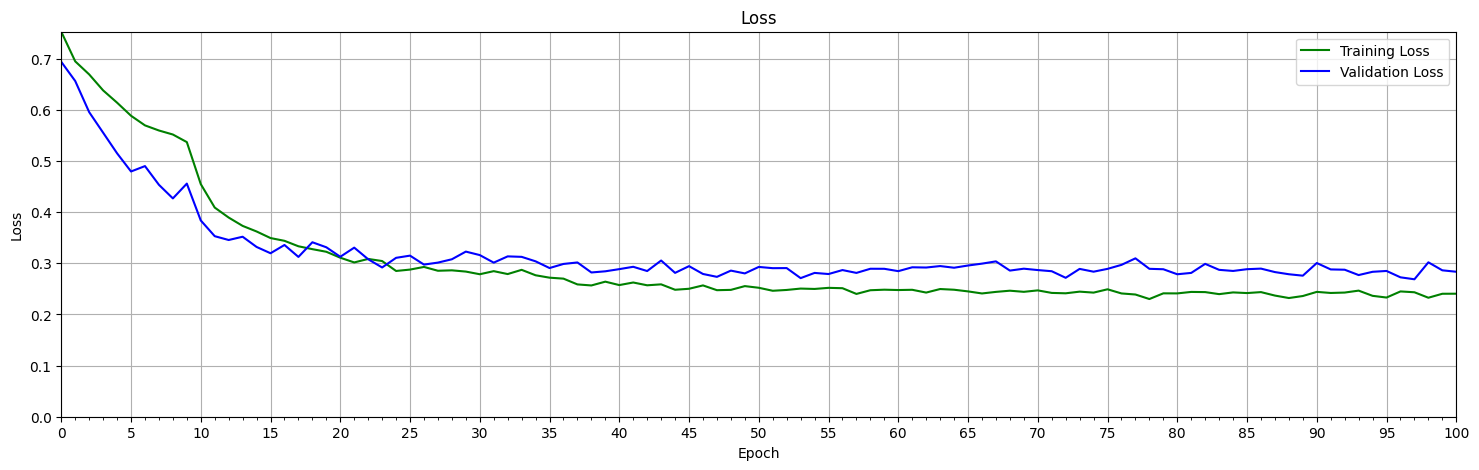

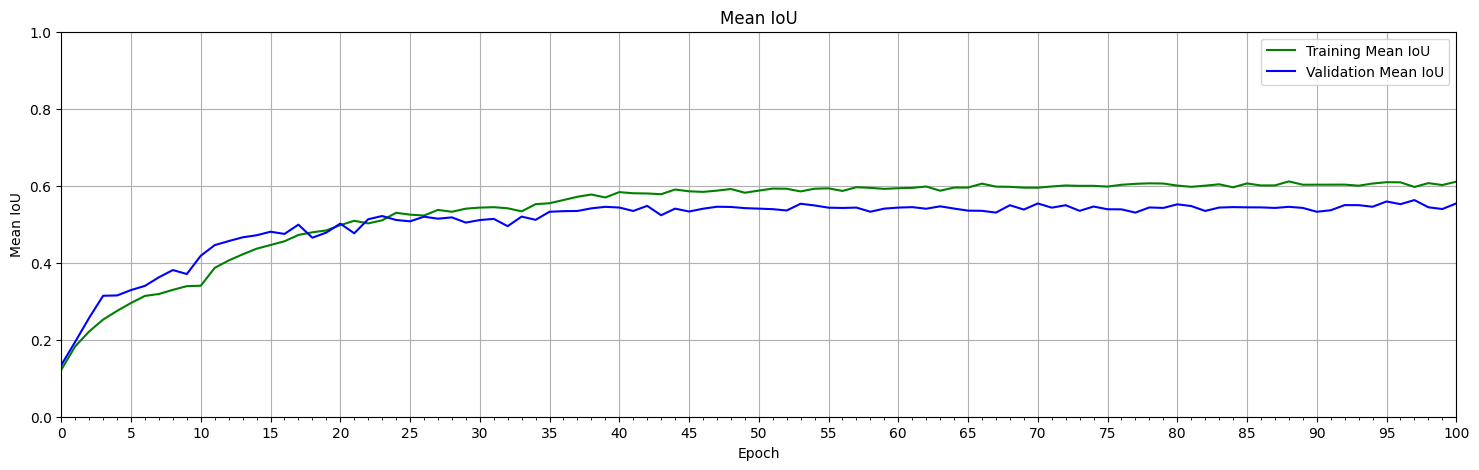

In [ ]:
if load_version == None:
  # Pixel accuracy
  train_acc = history.history["main_output_accuracy"]
  valid_acc = history.history["val_main_output_accuracy"]

  # IoU.
  train_loss = history.history["main_output_loss"]
  valid_loss = history.history["val_main_output_loss"]

  train_mean_iou = history.history['main_output_mean_iou']
  valid_mean_iou = history.history['val_main_output_mean_iou']

  train_dice = history.history['main_output_dice_coefficient']
  valid_dice = history.history['val_main_output_dice_coefficient']

  max_loss = max(max(train_loss), max(valid_loss))

  plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

  plot_results([ train_dice, valid_dice ],
            ylabel="Dice",
            ylim = [0.0, 1.0],
            metric_name=["Training Dice", "Validation Dice"],
            color=["g", "b"])

  plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, max_loss],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

  plot_results([ train_mean_iou, valid_mean_iou ],
            ylabel="Mean IoU",
            ylim = [0.0, 1.0],
            metric_name=["Training Mean IoU", "Validation Mean IoU"],
            color=["g", "b"])


## 7. Inference [3 Points]


<font style="color:red">Plot inferences on 3 random images from your validation set.</font>

<font style="color:green">Note: Inference should be performed on the original image size and not on any resized image.</font>

**E.g., if the original image has (H, W) of (512, 384) and your model returns a final output (H', W') shape of (256, 256).
You need to resize your outputs to size (512, 384) before plotting.**


Example plots:

---
---

<img src='https://www.dropbox.com/scl/fi/pdzotralcpefiwmo0cmbm/c4-project3-Preds.jpg?rlkey=xhd1efekoifccq6cdee8reftg&dl=1'>


---


In [ ]:
def recreate_model(path, load_weights=False, config=DatasetConfig(), custom_objects=None, **kwargs):
    """
    For reloading trained model
    Args:
        path: current_version checkpoint path
        load_weights: Whether the files saved at path contains model weights
                      or the Entire model configuration
        **kwargs: use to pass additional keyword arguments to the load_model method
    Returns:
        Reinitialized Trained Model
    """
    models = []

    if load_weights:

        # Create model architecture
        mdl = models.append(create_model(image_size=(DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH), num_classes=DatasetConfig.NUM_CLASSES))

        # Load trained model best weights.
        path = os.path.join(path, "model.ckpt")
        mdl.load_weights(path).expect_partial()
    else:
        #model_paths = get_top_n_models(path, n=3, metric="val_main_output_dice_coefficient")
        model_paths = get_top_n_models(path, n=3, metric="valloss", mode="min")
        for path in model_paths:
            print(f"Loading model from path: {path}")
            models.append(tf.keras.models.load_model(path, custom_objects=custom_objects, **kwargs))

    return models

In [ ]:
import numpy as np

def ensemble_predict(models, batch_images, w_main=0.8, w_side=0.2):
    """
    Applies ensemble prediction over multiple models with weighted outputs.

    Args:
        models (list): List of Keras models with 3 outputs (main, edge, side).
        batch_images (np.ndarray): Batch of input images (B, H, W, 3).
        w_main (float): Weight for the main output.
        w_side (float): Weight for the side output.

    Returns:
        np.ndarray: Averaged ensemble prediction (B, H, W, C).
    """

# 89688
    w_main = 0.4
    w_side = 0.2
    w_mid  = 0.2
    w_high = 0.2
##    w_shallow = 0.2
    w_low = 0.2
    w_mid_high = 0.2

    ensemble_preds = []

    for model in models:
        outputs = model.predict(batch_images, verbose=0)
        # Ensure outputs are handled correctly, assuming they are lists or tensors
        if isinstance(outputs, list):
             main_out, edge_out, side_out, mid_out, high_out, low_out, mid_high_out = outputs[:7]
##             main_out, edge_out, side_out, mid_out, high_out, shallow_out, low_out, mid_high_out = outputs[:8]
##             main_out, edge_out, side_out = outputs[:3]
        else: # Assume single output tensor if not a list
             main_out = outputs
             edge_out = tf.zeros_like(main_out[:,:,:,:1]) # Create dummy edge if not available
             side_out = tf.zeros_like(main_out) # Create dummy side if not available
             mid_out = tf.zeros_like(main_out)
             high_out = tf.zeros_like(main_out)
##             shallow_out = tf.zeros_like(main_out)
             low_out = tf.zeros_like(main_out)
             mid_high_out = tf.zeros_like(main_out)


        # Weighted combination
        # Convert to tensors if they are not already
        main_out = tf.convert_to_tensor(main_out, dtype=tf.float32)
        edge_out = tf.convert_to_tensor(edge_out, dtype=tf.float32)
        side_out = tf.convert_to_tensor(side_out, dtype=tf.float32)
        mid_out = tf.convert_to_tensor(mid_out, dtype=tf.float32)
        high_out = tf.convert_to_tensor(high_out, dtype=tf.float32)
##        shallow_out = tf.convert_to_tensor(shallow_out, dtype=tf.float32)
        low_out = tf.convert_to_tensor(low_out, dtype=tf.float32)
        mid_high_out = tf.convert_to_tensor(mid_high_out, dtype=tf.float32)

        # Ensemble main and side outputs
        combined = w_main * main_out + w_side * side_out + w_mid * mid_out + w_high * high_out + low_out * w_low + mid_high_out * w_mid_high
##        combined = w_main * main_out + w_side * side_out + w_mid * mid_out + w_high * high_out + shallow_out * w_shallow + low_out * w_low + mid_high_out * w_mid_high
##        combined = w_main * main_out + w_side * side_out

        # Apply edge sharpening
        combined *= (1.0 + edge_out)
        combined /= tf.reduce_sum(combined, axis=-1, keepdims=True) + 1e-6

        ensemble_preds.append(combined.numpy()) # Convert to numpy array here

    # Stack then average across models (axis=0 is across models)
    ensemble_preds = np.stack(ensemble_preds, axis=0)  # shape: (M, B, H, W, C)
    avg_preds = np.mean(ensemble_preds, axis=0)        # shape: (B, H, W, C)

    return avg_preds

In [ ]:
def average_checkpoints(checkpoint_paths, model_fn):
    """
    checkpoint_paths: List of filepaths to saved Keras models (.h5 or .keras)
    model_fn: Callable that returns a compiled model with same architecture
    """
    if not checkpoint_paths:
        raise ValueError("No checkpoint paths provided.")

    # Load first model to get initial weights structure
    base_model = model_fn()
    base_model.load_weights(checkpoint_paths[0])
    avg_weights = [np.array(w) for w in base_model.get_weights()]

    # Sum weights from remaining checkpoints
    for path in checkpoint_paths[1:]:
        model = model_fn()
        model.load_weights(path)
        weights = model.get_weights()
        avg_weights = [aw + np.array(w) for aw, w in zip(avg_weights, weights)]

    # Average them
    num_models = len(checkpoint_paths)
    avg_weights = [w / num_models for w in avg_weights]

    # Assign to new model
    final_model = model_fn()
    final_model.set_weights(avg_weights)
    return final_model

In [ ]:
if load_version == None:
  load_version = current_version_name

checkpoint_path = os.path.join(training_config.root_checkpoint_dir, load_version)

# we need the top three checkpoint paths

# then call the function to average the weights

trained_models = recreate_model(checkpoint_path, False, DatasetConfig(), custom_objects)


Found top 3 models based on 'valloss':
  Score: 0.6872, Path: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148/epoch_54_valloss_0.6872.keras
  Score: 0.6942, Path: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148/epoch_40_valloss_0.6942.keras
  Score: 0.6970, Path: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148/epoch_73_valloss_0.6970.keras
Loading model from path: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148/epoch_54_valloss_0.6872.keras
Loading model from path: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148/epoch_40_valloss_0.6942.keras
Loading model from path: /content/drive/My Drive/kaggle/Project_3_FloodNet_Dataset/Logs_Checkpoints/Model_checkpoints/version_148/epoch_73_valloss_0.6970.keras


In [ ]:
##evaluate = trained_models[0].evaluate(val_dataset)

### Display all metric results with names
##for value in evaluate:
##    print(f"{value:.4f}")


In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

def fast_edge_refinement(image, soft_prediction, sharpen_factor=1.0, edge_sigma=0.5):
    """
    Applies fast edge-aware refinement to softmax predictions using image edges.

    Args:
        image: (H, W, 3) input RGB image in [0, 1]
        soft_prediction: (H, W, C) softmax probabilities
        sharpen_factor: float multiplier for boosting contrast at edges
        edge_sigma: float, Gaussian blur before edge detection

    Returns:
        refined_mask: (H, W) argmax label map after refinement
    """
    image_gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    image_blurred = gaussian_filter(image_gray, sigma=edge_sigma)

    grad_x = cv2.Sobel(image_blurred, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image_blurred, cv2.CV_32F, 0, 1, ksize=3)
    edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    edge_mask = edge_magnitude / (np.max(edge_magnitude) + 1e-6)

    sharpened_prediction = soft_prediction + sharpen_factor * np.expand_dims(edge_mask, axis=-1)
    sharpened_prediction /= np.sum(sharpened_prediction, axis=-1, keepdims=True) + 1e-6

    return sharpened_prediction

In [ ]:
def apply_confidence_threshold(pred_softmax, threshold=0.2, background_class=0):
    """
    pred_softmax: np.ndarray, shape (H, W, num_classes), softmax probabilities
    threshold: float, pixels below this will be suppressed
    background_class: int, class index to assign to low-confidence pixels
    """
    # Compute max probability and predicted class
    max_probs = np.max(pred_softmax, axis=-1)
    pred_classes = np.argmax(pred_softmax, axis=-1)

    # Suppress low-confidence pixels by assigning them to background
    pred_classes[max_probs < threshold] = background_class

    return pred_classes

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter

def crf_like_smoothing_batch(preds, images=None, num_classes=10, sigma=0.1):
    """
    Apply Gaussian smoothing over a batch of softmax predictions.

    Args:
        preds (np.ndarray): Softmax outputs of shape (B, H, W, num_classes)
        images (np.ndarray): Optional RGB images of shape (B, H, W, 3) — not used here.
        num_classes (int): Number of classes.
        sigma (float): Standard deviation for Gaussian filter.

    Returns:
        np.ndarray: Smoothed predictions of shape (B, H, W, num_classes)
    """
    B, H, W, C = preds.shape
    smoothed_preds = np.zeros_like(preds)

    for i in range(B):
        for c in range(num_classes):
            smoothed_preds[i, ..., c] = gaussian_filter(preds[i, ..., c], sigma=sigma)
        # Normalize each prediction
        smoothed_preds[i] /= np.sum(smoothed_preds[i], axis=-1, keepdims=True) + 1e-8  # avoid division by zero

    return smoothed_preds


In [ ]:
import tensorflow as tf

def apply_augmentation(images, mode):
    if mode == "hflip":
        return tf.image.flip_left_right(images)

    elif mode == "vflip":
        return tf.image.flip_up_down(images)

    elif mode == "rot90":
        return tf.image.rot90(images, k=1)

    elif mode == "rot180":
        return tf.image.rot90(images, k=2)

    elif mode == "rot270":
        return tf.image.rot90(images, k=3)

    elif mode == "transpose":
        return tf.image.transpose(images)

    # --- Color Adjustments ---
    elif mode == "brightness":
        return tf.image.adjust_brightness(images, delta=0.1)

    elif mode == "contrast":
        # Disable deterministic ops for adjust_contrast
        with tf.device('/CPU:0'): # Force CPU execution
            adjusted = tf.image.adjust_contrast(images, contrast_factor=1.2)
        return adjusted

    elif mode == "gamma":
        return tf.image.adjust_gamma(images, gamma=0.9)

    elif mode == "saturation":
        return tf.image.adjust_saturation(images, saturation_factor=1.2)

    elif mode == "hue":
        return tf.image.adjust_hue(images, delta=0.05)

    # --- Zoom In (Crop center and resize back) ---
    elif mode == "zoom_in":
        crop = tf.image.central_crop(images, central_fraction=0.9)
        return tf.image.resize(crop, tf.shape(images)[1:3])

    # --- Zoom Out (Pad and resize) ---
    elif mode == "zoom_out":
        pad_amt = tf.cast(0.05 * tf.cast(tf.shape(images)[1], tf.float32), tf.int32)
        images_padded = tf.pad(images, [[0, 0], [pad_amt, pad_amt], [pad_amt, pad_amt], [0, 0]], mode='REFLECT')
        return tf.image.resize(images_padded, tf.shape(images)[1:3])

    # --- Gaussian Noise ---
    elif mode == "gaussian_noise":
        noise = tf.random.normal(shape=tf.shape(images), mean=0.0, stddev=0.01)
        return tf.clip_by_value(images + noise, 0.0, 1.0)

    else:
        return images  # mode == "none" or unrecognized


# --- TTA Invert Function ---
def invert_augmentation(predictions, mode):
    if mode == "hflip":
        return tf.image.flip_left_right(predictions)
    elif mode == "vflip":
        return tf.image.flip_up_down(predictions)
    elif mode == "rot90":
        return tf.image.rot90(predictions, k=3)  # Rotate back
    elif mode == "rot180":
        return tf.image.rot90(predictions, k=2)
    elif mode == "rot270":
        return tf.image.rot90(predictions, k=1)
    elif mode == "transpose":
        return tf.image.transpose(predictions)  # transpose is its own inverse

    # ⚡ Color augmentations do not need inversion
    elif mode in ["brightness", "contrast", "gamma", "saturation", "hue"]:
        return predictions

    # ⚡ Zoom / Translate / Noise are not easily invertible
    elif mode in ["zoom_in", "zoom_out", "translate", "gaussian_noise"]:
        return predictions

    else:
        return predictions  # "none" or unrecognized

In [ ]:
import numpy as np

def combine_tta_predictions_weighted(preds_list):
    """
    Combines multiple TTA softmax predictions using confidence-weighted averaging.

    Args:
        preds_list: list of np.arrays of shape (H, W, C), one per TTA mode.
                    Each must be softmax probabilities.

    Returns:
        Weighted softmax average: np.array of shape (H, W, C)
    """
    assert all(p.shape == preds_list[0].shape for p in preds_list), "Shape mismatch in TTA preds"

    weighted_preds = []
    weights = []

    for pred in preds_list:
        conf = np.max(pred, axis=-1, keepdims=True)  # shape: (H, W, 1)
        weighted = pred * conf                       # scale by confidence
        weighted_preds.append(weighted)
        weights.append(conf)

    # Stack and sum
    sum_weighted_preds = np.sum(weighted_preds, axis=0)
    sum_weights = np.sum(weights, axis=0)

    # Normalize to get weighted average
    avg_pred = sum_weighted_preds / (sum_weights + 1e-6)  # avoid division by 0

    return avg_pred


In [ ]:
def predict_with_tta_and_crf_batch(models, images, num_classes=10, batch_size=8, tta_modes=["none"]):
    """
    Predicts segmentation masks with optional TTA and CRF for a batch of images.

    Args:
        model: Trained model
        images: Tensor (batch_size, H, W, 3), normalized float32
        apply_crf: bool, whether to apply CRF refinement
        batch_size: batch size for prediction
        tta_modes: list of TTA augmentations (e.g., ["none", "hflip"])

    Returns:
        Refined masks: np.array (batch_size, H, W), integer labels 0-9
    """

    preds_all = []

    for mode in tta_modes:
        aug_images = apply_augmentation(images, mode)

        # Check if aug_images is None or empty
        if aug_images is None or aug_images.size == 0:
            print(f"Warning: aug_images is None or empty for mode: {mode}, skipping...")
            continue

        combined = ensemble_predict(models, aug_images)

        # Apply the invert_augmentation to the "main_output" only
        restored = invert_augmentation(combined, mode)
        preds_all.append(restored) # Append only the "main_output"

    # combine the predictions
    final_preds = combine_tta_predictions_weighted(preds_all)

    return final_preds


In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

def optimized_inference(models, dataset,
                        num_batches_to_process=5,
                        batch_size=8,
                        num_classes=10,
                        show_visuals=True,
                        w_main=0.8,
                        w_side=0.2,
                        id2labels=None,
                        id2color=None):

    visual_count = 0
    count = 0

    smooth=1e-6
    total_intersection = np.zeros(num_classes, dtype=np.float64)
    total_cardinality = np.zeros(num_classes, dtype=np.float64)
    total_union = np.zeros(num_classes, dtype=np.float64)
    total_dice = np.zeros(num_classes, dtype=np.float64)
    total_iou = np.zeros(num_classes, dtype=np.float64)

    #tta_modes = ["none", "hflip", "vflip", "rot90", "rot180", "rot270", "transpose", "brightness", "contrast", "gamma", "saturation", "hue", "gaussian_noise"]
    tta_modes = ["none", "hflip", "vflip", "brightness", "contrast", "gamma", "saturation", "hue", "gaussian_noise"]

    for idx, (batch_img, masks) in enumerate(dataset):
        count = 0
        if idx >= num_batches_to_process:
            break

        batch_mask = masks["main_output"]

        # Predict on the entire batch
        preds_batch = predict_with_tta_and_crf_batch(models, batch_img, num_classes=num_classes, batch_size=batch_size, tta_modes=tta_modes)

        preds_batch = crf_like_smoothing_batch(preds_batch, num_classes=num_classes)

        y_true_flat = tf.reshape(batch_mask, [-1, num_classes])
        y_pred_flat = tf.reshape(preds_batch, [-1, num_classes])

        intersection = tf.reduce_sum(y_true_flat * y_pred_flat, axis=0)
        cardinality = tf.reduce_sum(y_true_flat + y_pred_flat, axis=0)
        union = tf.reduce_sum(y_true_flat, axis=0) + tf.reduce_sum(y_pred_flat, axis=0) - intersection

        total_intersection += intersection.numpy()
        total_cardinality += cardinality.numpy()
        total_union += union.numpy()

        for i in range(batch_img.shape[0]): # Iterate through each image in the batch
            count += 1
            img = batch_img[i]
            preds = preds_batch[i] # Access prediction for current image in batch

            preds_tensor = tf.convert_to_tensor(preds, dtype=tf.float32)
            sharpened_preds = preds_tensor
            sharpened_preds = fast_edge_refinement(img, preds_tensor)

            if show_visuals and visual_count < 5:
                visual_count += 1
                pmask = np.argmax(sharpened_preds, axis=-1)
                gt_mask = np.argmax(batch_mask[i], axis=-1)

                true_mask_rgb = num_to_rgb(gt_mask, color_map=id2color)
                pred_mask_rgb = num_to_rgb(pmask, color_map=id2color)
                overlay = image_overlay(img, pred_mask_rgb)

                fig, axes = plt.subplots(1, 4, figsize=(20, 8))
                titles = ["Original Image", "Ground Truth Mask", "Predicted Mask", "Overlay"]
                images = [img, true_mask_rgb, pred_mask_rgb, overlay]

                for ax, im, title in zip(axes, images, titles):
                    ax.imshow(im)
                    ax.set_title(title)
                    ax.axis('off')
                plt.tight_layout()
                plt.show()

    dice_per_class = (2. * total_intersection + smooth) / (total_cardinality + smooth)
    iou_per_class = (total_intersection + smooth) / (total_union + smooth)
    mean_dice = np.mean(dice_per_class)
    mean_iou = np.mean(iou_per_class)

    print("==== Per Class Dice ====")
    for cls in range(num_classes):
        label = id2labels[cls] if id2labels else f"Class {cls}"
        print(f"{label}: Dice = {dice_per_class[cls]:.4f}")

    print("\n==== Per Class IoU ====")
    for cls in range(num_classes):
        label = id2labels[cls] if id2labels else f"Class {cls}"
        print(f"{label}: IoU = {iou_per_class[cls]:.4f}")

    print(f"\nAverage Dice: {np.mean(mean_dice):.4f}")
    print(f"Average mIoU: {np.mean(mean_iou):.4f}")


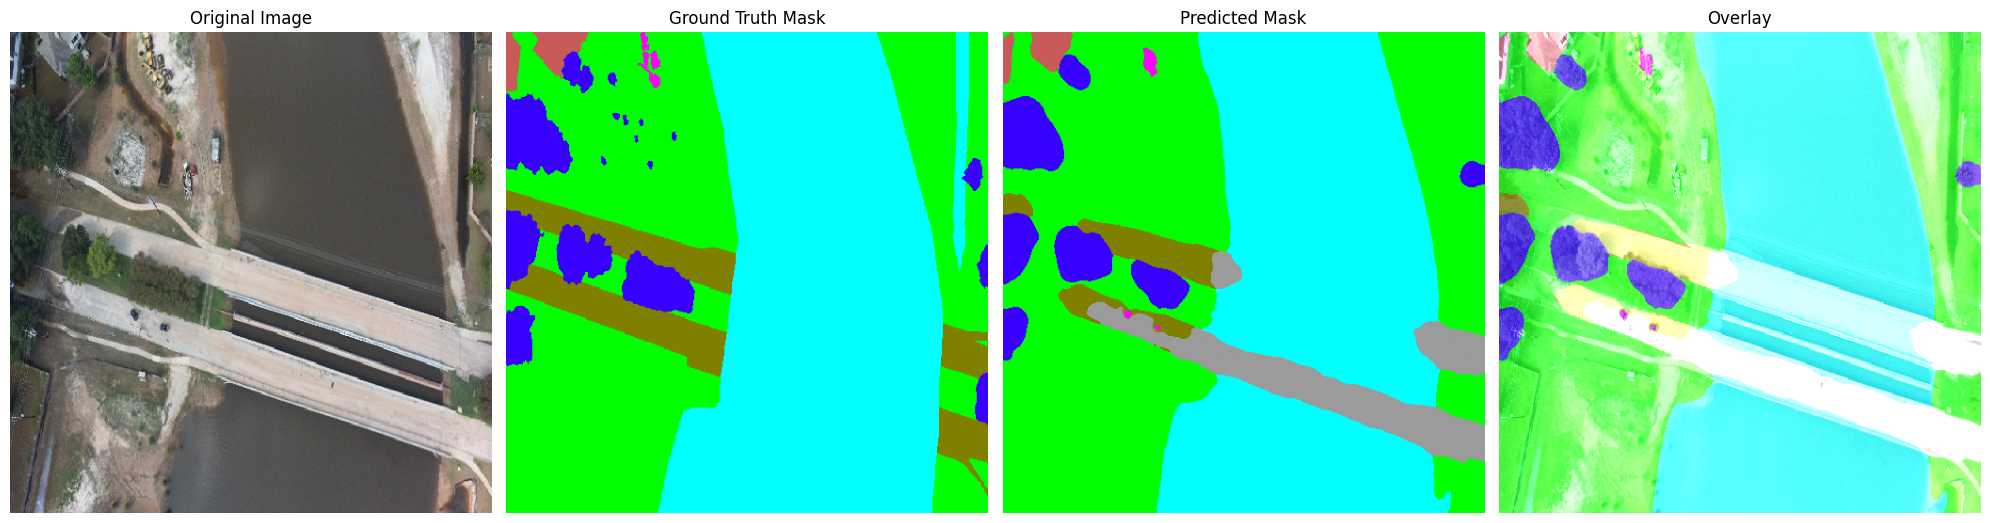

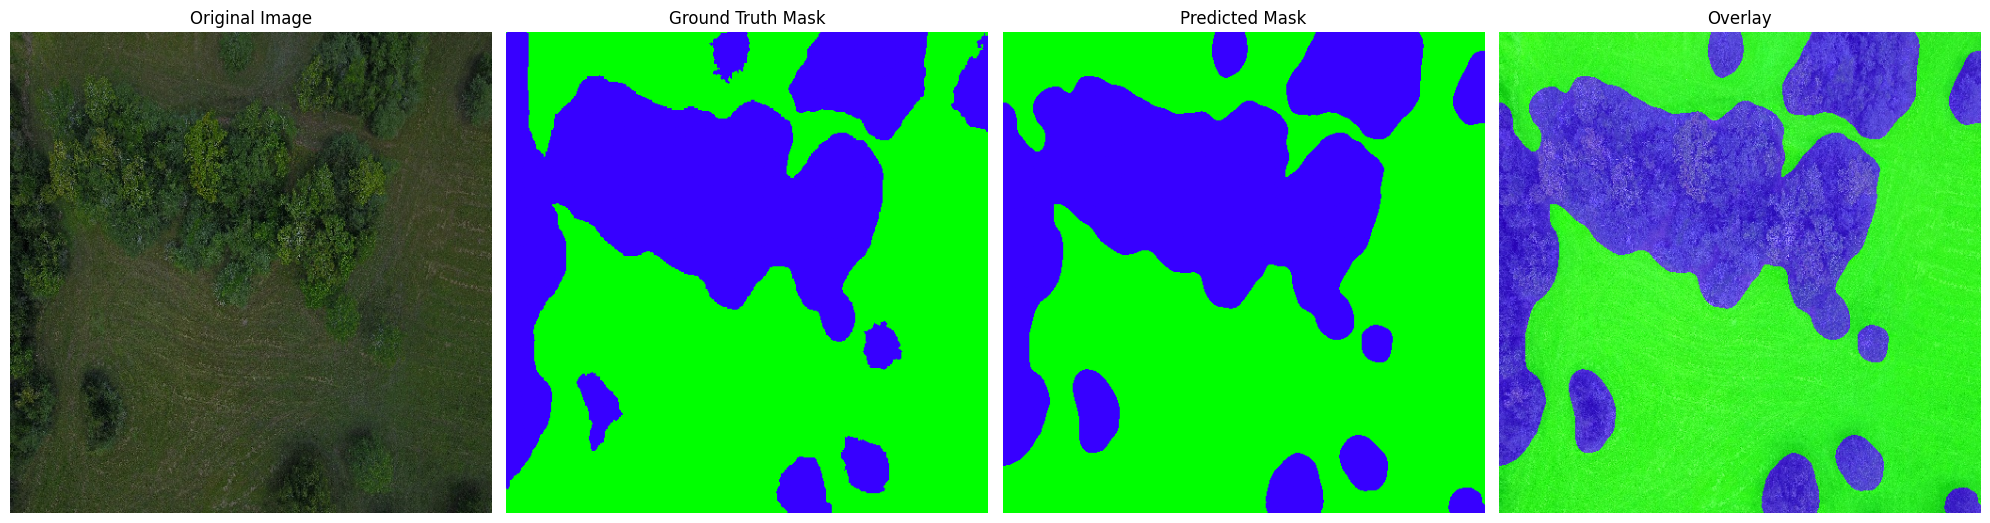

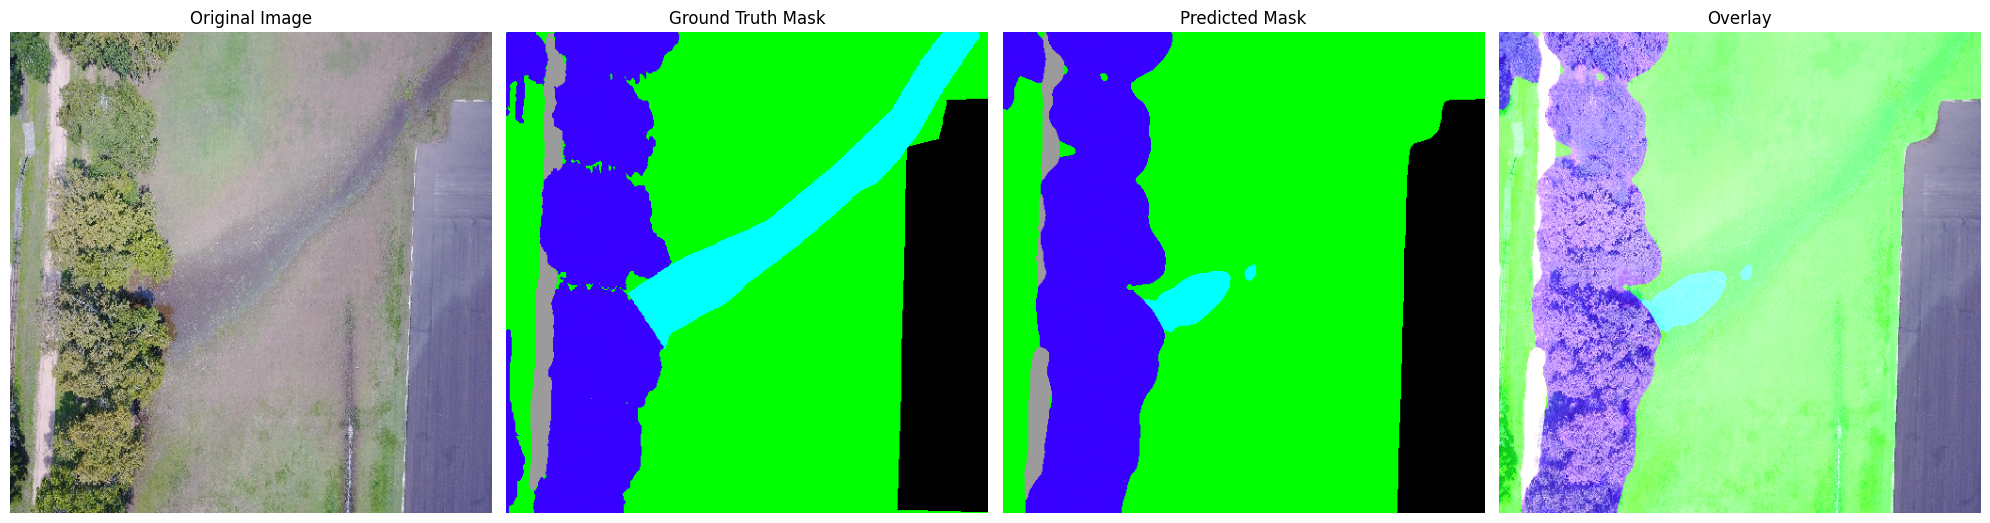

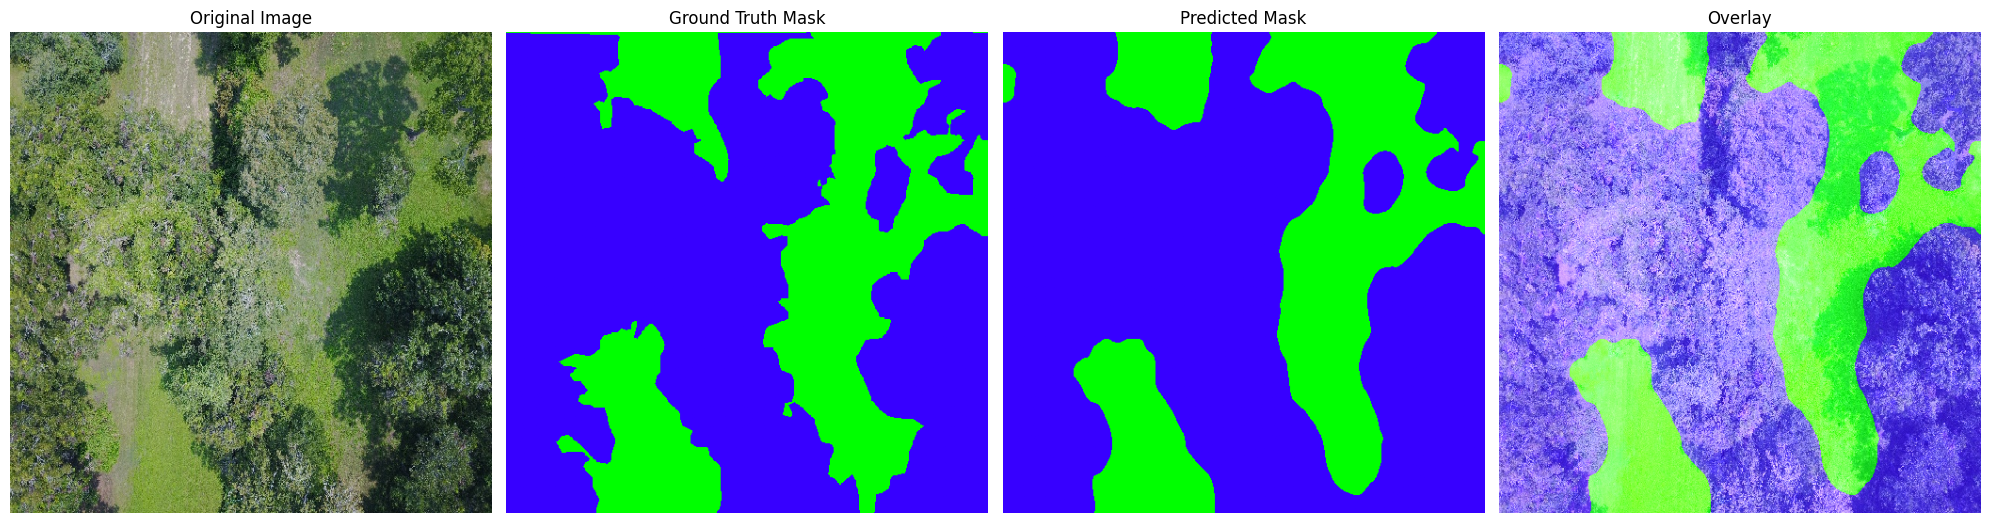

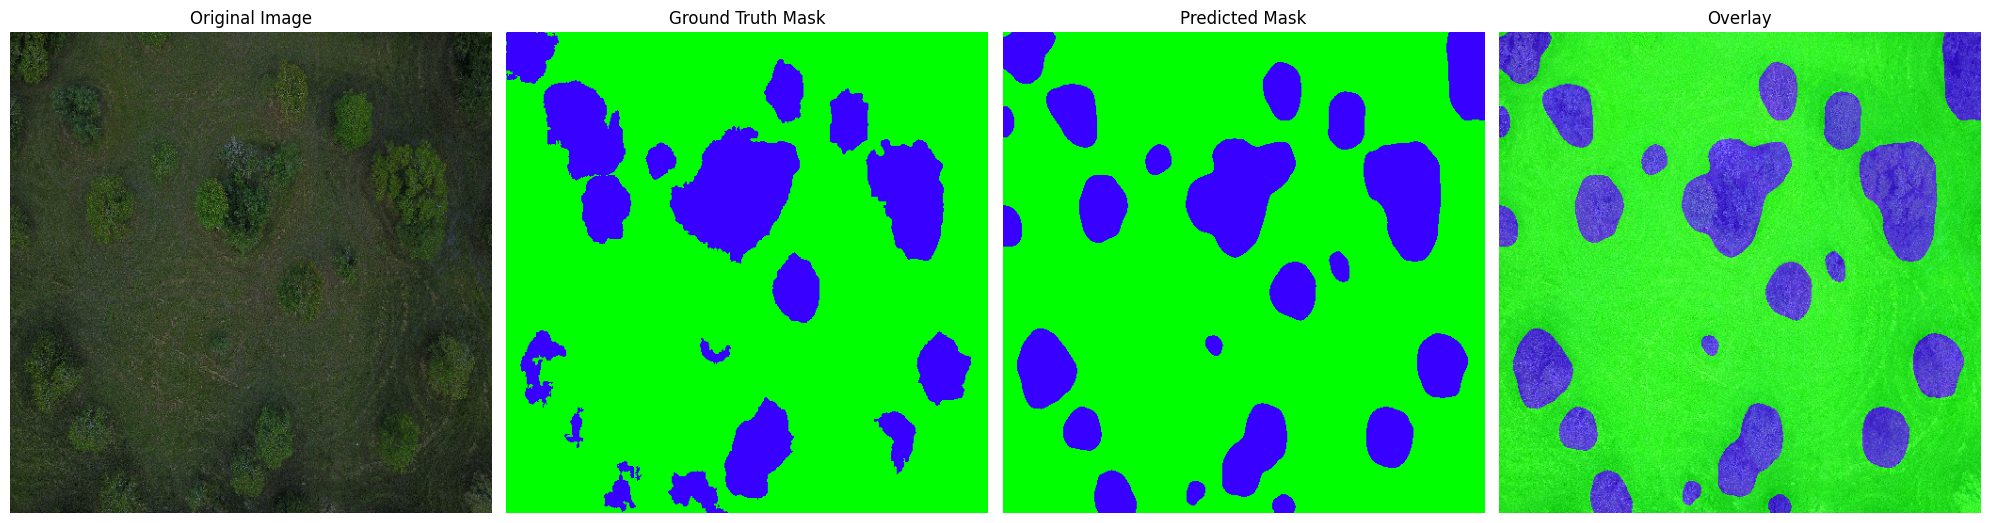

==== Per Class Dice ====
Background/waterbody: Dice = 0.2891
Building Flooded: Dice = 0.8289
Building Non-Flooded: Dice = 0.8725
Road Flooded: Dice = 0.7153
Road Non-Flooded: Dice = 0.8664
Water: Dice = 0.8007
Tree: Dice = 0.8815
Vehicle: Dice = 0.6268
Pool: Dice = 0.7542
Grass: Dice = 0.9322

==== Per Class IoU ====
Background/waterbody: IoU = 0.1690
Building Flooded: IoU = 0.7079
Building Non-Flooded: IoU = 0.7738
Road Flooded: IoU = 0.5568
Road Non-Flooded: IoU = 0.7644
Water: IoU = 0.6676
Tree: IoU = 0.7880
Vehicle: IoU = 0.4565
Pool: IoU = 0.6054
Grass: IoU = 0.8730

Average Dice: 0.7568
Average mIoU: 0.6362


In [ ]:
optimized_inference(trained_models, val_dataset,
                    num_batches_to_process=30,
                    batch_size=1,
                    num_classes=10,
                    show_visuals=True,
                    id2labels=id2labels,
                    id2color=id2color)

## 8. Prepare Submission CSV [10 Points]


<font style="color:red">Write your code to prepare the submission CSV file.</font>

**Note:** In the submission file, you have to write pixel values in ***Run-length Encoded format***. This is done to reduce the size of submission file.

**A note on how Run-length encoding for Kaggle competitions** (taken from [HuBMAP - Hacking the Kidney Competition](https://www.kaggle.com/code/leahscherschel/run-length-encoding/notebook))

> *To reduce the submission file size, teams must submit segmentation results using run-length encoding on the pixel values. Instead of submitting an exhaustive list of indices for your segmentation, you will submit pairs of values that contain a start position and a run length. E.g. `0 3` implies starting at `pixel 0` and running a total of `3` pixels `(0,1,2)`. The competition format requires a space-delimited list of pairs. For example, `0 3 10 5` implies pixels `0,1,2`, and `10,11,12,13,14` are to be included in the mask. The metric checks that the pairs are sorted and positive and the decoded pixel values are not duplicated. The pixels are numbered from **top to bottom, then left to right:** 0 is pixel (0,0), 1 is pixel (1,0), and 2 is pixel (2,0), etc.*

---

Additional RLE code discussion from the same competition: [Fast Code to Convert Mask to RLE](https://www.kaggle.com/competitions/hubmap-kidney-segmentation/discussion/232357)

[Here another blog post to understand what is Encoded Pixels.](https://medium.com/analytics-vidhya/generating-masks-from-encoded-pixels-semantic-segmentation-18635e834ad0)

**You are free to use any code available online as long as the output format is maintained.**  

----

1. For generating a `submission.csv` file, you need to encode the model outputs for images in the testing set using **Run-Length Encoding (RLE)**.

2. RLE is performed on binary masks. So RLE is performed on each output channel.

3. RLE needs to performed on predictions outputs having the same size as the original image

4. Similar to **Inference section**, if the original image has (H, W) of (512, 384) and your model returns a final output (H', W') shape of (256, 256). You need to resize your outputs to size (512, 384) before performing RLE.


**Required Columns:**
1. **`IMG_ID`**
2. **`EncodedString`**

----

As RLE works on one binary mask at a time and we have multiple classes per image. Each image should have `10`  rows in your `submission.csv` file.

Example: For Image name = `test_image.jpg`


**IMG_IDs** will be

```python
test_image_00
test_image_01
test_image_02
test_image_03
test_image_04
test_image_05
test_image_06
test_image_07
test_image_08
test_image_09
```

**Format:** `{image_name}_{class_id}` (no extention)

----

**`sample_submission.csv`.**

```html
IMG_ID,EncodedString
10181_00,
10181_01,
10181_02,
10181_03,
10181_04,
10181_05,227 2 707 2 1187 2 1667 2
10181_06,28317 4 28797 4 29277 4 29757 4 35035 6 35515 6 35995 6 36475 6 36955 6 37435 6 37917 4 38397 4
10181_07,
10181_08,
10181_09,
10806_00,
10806_01,
10806_02,140621 4 141101 4
10806_03,
10806_04,3143 12 3159 6 3623 12 3639 6 4025 14 409
```


**`EncodedString`** can be blank if there's no prediction available.

----

In [ ]:
def loadTestImagesFromDir(test_directory):
    """
    Loads all images from the given directory.

    Args:
        test_directory: Path to the directory containing test images.

    Returns:
        image_ids: List of image IDs.
        image_shapes: List of original image shapes.
        image_batch: List of loaded images.
    """

    image_ids = []
    image_shapes = []
    image_batch = []

    image_paths = sorted(glob.glob(os.path.join(test_directory, "*.jpg")))

    for image_path in image_paths:
        image_id = os.path.basename(image_path).split(".")[0]
        image_ids.append(image_id)
        image = cv2.imread(image_path)
        original_shape = image.shape[:2]  # Store original shape before resizing
        image_shapes.append(original_shape)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image = cv2.resize(image, (DatasetConfig.IMG_WIDTH, DatasetConfig.IMG_HEIGHT), interpolation=cv2.INTER_NEAREST)
        image_batch.append(image)  # Append resized image to the list
        #image_batch = np.array(image_batch, dtype=np.float32) / 255.0  # 🔥 Normalize images to [0,1]

    return image_ids, image_shapes, image_batch  # Return ids, shapes, and loaded images


In [ ]:
def mask2rle(arr):
    '''
    Efficient implementation of mask2rle, from @paulorzp
    --
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    Source: https://www.kaggle.com/xhlulu/efficient-mask2rle
    '''
    pixels = arr.T.flatten()

    # for each pixel, if the pixel is greater than 0, create a run, add 1 to the run until a pixel with value 0 is reached
    runs = []
    current_run_start = None

    for i, pixel_value in enumerate(pixels):
        if pixel_value > 0:
          #print(pixel_value)
          if current_run_start is None:
                current_run_start = i
        else:
            if current_run_start is not None:
                runs.append((current_run_start, i - current_run_start))
                current_run_start = None

    # Handle the case where the last run extends to the end of the image
    if current_run_start is not None:
        runs.append((current_run_start, len(pixels) - current_run_start))

    rleStr = ''
    for run in runs:
        rleStr += f'{run[0]} {run[1]} '

    return rleStr[:-1]


def rle2mask(mask_rle, shape):
    if mask_rle == '':  # Handle empty RLE string
        return np.zeros(shape, dtype=np.uint8)

    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)

    flattened_transposed_img = img.T.flatten()

    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    #starts -= 1
    ends = starts + lengths
    for lo, hi in zip(starts, ends):
        flattened_transposed_img[lo:hi] = 1

    pos = 0
    for col in range(shape[1]):
      for row in range(shape[0]):
        img[row * shape[1] + col] = flattened_transposed_img[pos]
        pos += 1

    return img.reshape(shape)


In [ ]:
# Sample binary image
image = np.array([
    [0, 0, 1, 1],
    [1, 1, 0, 0],
    [0, 1, 1, 0]
], dtype=np.uint8)

encoded = mask2rle(image)
print("Encoded RLE:", encoded)

decoded = rle2mask(encoded, image.shape)
print("Decoded Image:\n", decoded)

# Check if original and decoded are equal
print("Match:", np.array_equal(image, decoded))

Encoded RLE: 1 1 4 3 8 2
Decoded Image:
 [[0 0 1 1]
 [1 1 0 0]
 [0 1 1 0]]
Match: True


In [ ]:
import pandas as pd # Import pandas and assign it to 'pd'

def create_submission_file(models, test_image_paths, output_filename="submission.csv", batch_size=1):
    """
    Optimized version: batch predicts, resizes correctly, and saves RLE CSV.

    Args:
        model: Trained segmentation model.
        test_image_paths: List of test image paths.
        output_filename: Name of output submission file.
        batch_size: Batch size for prediction (default 8).
    """

    #tta_modes = ["none", "hflip", "vflip", "rot90", "rot180", "rot270", "transpose", "brightness", "contrast", "gamma", "saturation", "hue", "gaussian_noise"]
    tta_modes = ["none", "hflip", "vflip", "brightness", "contrast", "gamma", "saturation", "hue", "gaussian_noise"]

    submission_data = []

    # 1. Load images into batch
    image_ids, original_shapes, image_batch = loadTestImagesFromDir(test_directory=test_image_paths)

    image_batch = np.array(image_batch, dtype=np.float32) / 255.0  # 🔥 Normalize images to [0,1]

    count = 0
    # for each image, make a prediction, and then for the result, do RLE encoding of each one hot encoded channel
    for idx in range(len(image_batch)):
        img = image_batch[idx]

        #pred = model.predict(np.expand_dims(img, axis=0), batch_size=1, verbose=0)

        # add batch dimension
        img_batch = np.expand_dims(img, axis=0)

        preds = predict_with_tta_and_crf_batch(models, img_batch, num_classes=num_classes, batch_size=batch_size, tta_modes=tta_modes)

        preds = crf_like_smoothing_batch(preds, num_classes=DatasetConfig.NUM_CLASSES)

        pred = preds[0]

        sharpened_pred = fast_edge_refinement(img, pred)
        sharpened_pred = pred

        pred_labels = np.argmax(sharpened_pred, axis=-1)  # Shape: (H, W)

        pred_labels = np.expand_dims(pred_labels, axis=-1)  # Shape: (H, W, 1)

        # Resize to original shape using nearest neighbor
        orig_height, orig_width = original_shapes[idx]
        pred_labels = tf.image.resize(pred_labels, size=(orig_height, orig_width), method='nearest')

        pred_labels = tf.squeeze(pred_labels).numpy().astype(np.uint8)  # Shape: (orig_H, orig_W)

        # Encode each class separately
        image_id = image_ids[idx]
        for class_id in range(DatasetConfig.NUM_CLASSES):
            binary_mask = (pred_labels == class_id).astype(np.uint8)
            encoded_string = mask2rle(binary_mask)
            img_id_str = f"{image_id}_{class_id:02d}"
            submission_data.append([img_id_str, encoded_string])

        count += 1

        print(f"Processed {count} images.")

    # 5. Save to CSV
    submission_df = pd.DataFrame(submission_data, columns=["IMG_ID", "EncodedString"])
    submission_df.to_csv(output_filename, index=False)


    print(f"Submission file '{output_filename}' created successfully!")

In [ ]:

# create the submission file
# Assuming 'trained_model' is loaded
# Replace with your actual test data and model
TEST_DIR = os.path.join(ROOT_DIR, PROJECT_FOLDER, "test")
TEST_IMAGE_DIR = os.path.join(TEST_DIR, "images")

outfile = os.path.join(PROJECT_DIR, "submission.csv")

create_submission_file(trained_models, TEST_IMAGE_DIR, outfile)

Processed 1 images.
Processed 2 images.
Processed 3 images.
Processed 4 images.
Processed 5 images.
Processed 6 images.
Processed 7 images.
Processed 8 images.
Processed 9 images.
Processed 10 images.
Processed 11 images.
Processed 12 images.
Processed 13 images.
Processed 14 images.
Processed 15 images.
Processed 16 images.
Processed 17 images.
Processed 18 images.
Processed 19 images.
Processed 20 images.
Processed 21 images.
Processed 22 images.
Processed 23 images.
Processed 24 images.
Processed 25 images.
Processed 26 images.
Processed 27 images.
Processed 28 images.
Processed 29 images.
Processed 30 images.
Processed 31 images.
Processed 32 images.
Processed 33 images.
Processed 34 images.
Processed 35 images.
Processed 36 images.
Processed 37 images.
Processed 38 images.
Processed 39 images.
Processed 40 images.
Processed 41 images.
Processed 42 images.
Processed 43 images.
Processed 44 images.
Processed 45 images.
Processed 46 images.
Processed 47 images.
Processed 48 images.
P

In [ ]:
##%tensorboard --logdir {TrainingConfig.log_dir}


## 9. Kaggle Submission Score [50 Points]

You need a minimum dice score of `80%` on the **Public test leaderboard**.<br>

If the Dice score is less than `80%`, you gain no points for this section.

**Dice scores will be rounded-off to the nearest integer.**

Submit `submission.csv` (prediction for images in test.csv) in the **Submit Predictions** tab in Kaggle to get evaluated for this section.

Please share your profile link, user id and score achieved.

```
URL:
Profile Name:
Points Scored:
```

**Upon completing the project, <font style="color:red">upload the notebook to the lab for grading and feedback.</font>**